# Предобработка данных

Предобработка данных - это важный этап в процессе анализа данных и построения моделей машинного обучения. Этот процесс включает в себя ряд шагов для подготовки данных к использованию в анализе и моделировании. Предобработка данных состоит из нескольких важных шагов:

    1 - Импорт необходимых для предобработки библиотек, таких как pandas, numpy, matplotlib, seaborn
    
    2 - Считывание данных в датасет из некоторого хранилища (например csv-файла)
    
    3 - Проверка пригодности данных для обучения модели, проверка некоторых важных показателей датасета, выявление мест, необходимых для исправления, первоначальная корректировка датасета
    
    4 - Предварительный анализ данных, представление этих данных в виде различных диаграм
    
    5 - Обработка пропущенных значений, их замена с помощью одного из существующих вариантов
    
    6 - Обработка выбросов, которые могут препятствовать нормальному обучению модели
    
    7 - Удаление дубликатов и исправление "мусорных" значений
    
    8 - Кодировка нечисловых данных для возможности обучения модели

### Импортируем библиотеки

В рамках задачи предобработки данных для обучения модели нам понадобятся различные библиотеки обработки и визуализации данных. В нашем случае это следующие библиотеки: pandas, numpy, seaborn, matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Считывание данных в фрейм 

Входной датасет хранится в виде csv-файла и представляет собой информацию о футболистах в футбольном симуляторе FIFA 22, их рейтинге и других показателей, некоторые из которых определяют этот самый рейтинг

In [2]:
df = pd.read_csv("FIFA.csv")

Проверим вообще наличие и адекватность хранения наших данных. Выведем 5 первых значений датасета

In [3]:
df.head()

short_name  overall  potential    value_eur  wage_eur  age  \
0           L. Messi       93         93   78000000.0  320000.0   34   
1     R. Lewandowski       92         92  119500000.0  270000.0   32   
2  Cristiano Ronaldo       91         91   45000000.0  270000.0   36   
3          Neymar Jr       91         91  129000000.0  270000.0   29   
4       K. De Bruyne       91         91  125500000.0  350000.0   30   

   height_cm  weight_kg  club_team_id  league_level  ... mentality_composure  \
0        170         72          73.0           1.0  ...                  96   
1        185         81          21.0           1.0  ...                  88   
2        187         83          11.0           1.0  ...                  95   
3        175         68          73.0           1.0  ...                  93   
4        181         70          10.0           1.0  ...                  89   

   defending_marking_awareness  defending_standing_tackle  \
0                           20                         35   
1                           35                         42   
2                           24                         32   
3                           35                         32   
4                           68                         65   

   defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                        24                   6                    11   
1                        19                  15                     6   
2                        24                   7                    11   
3                        29                   9                     9   
4                        53                  15                    13   

   goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                   15                       14                     8   
1                   12                        8                    10   
2                   15                       14                    11   
3                   15                       15                    11   
4                    5                       10                    13   

   goalkeeping_speed  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 60 columns]

Для проверки выведем и 5 последних значений датасета

In [4]:
df.tail()

short_name  overall  potential  value_eur  wage_eur  age  \
19234           Song Defu       47         52    70000.0    1000.0   22   
19235           C. Porter       47         59   110000.0     500.0   19   
19236            N. Logue       47         55   100000.0     500.0   21   
19237           L. Rudden       47         60   110000.0     500.0   19   
19238  E. Lalchhanchhuaha       47         60   110000.0     500.0   19   

       height_cm  weight_kg  club_team_id  league_level  ...  \
19234        180         64      112541.0           1.0  ...   
19235        175         70         445.0           1.0  ...   
19236        178         72      111131.0           1.0  ...   
19237        173         66      111131.0           1.0  ...   
19238        167         61      113040.0           1.0  ...   

      mentality_composure  defending_marking_awareness  \
19234                  37                           38   
19235                  47                           37   
19236                  36                           38   
19237                  47                           10   
19238                  36                           33   

       defending_standing_tackle  defending_sliding_tackle  \
19234                         43                        48   
19235                         44                        47   
19236                         44                        48   
19237                         14                        11   
19238                         31                        37   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
19234                   6                    10                    5   
19235                  11                    12                    6   
19236                   8                     6                    7   
19237                   7                    10                    7   
19238                   8                    13                   13   

       goalkeeping_positioning  goalkeeping_reflexes  goalkeeping_speed  
19234                       15                    13                NaN  
19235                        8                    10                NaN  
19236                       10                     6                NaN  
19237                       14                    15                NaN  
19238                        9                    14                NaN  

[5 rows x 60 columns]

### Проверка пригодности данных

Для общего понимания выведем некоторую общую информацию о датасете. Для начала определим его размерность

In [5]:
df.shape

(19239, 60)

Выведем общую информацию о датафрейме, такую как названия столбцов, типы данных, хранящиеся в них, размерность

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   19239 non-null  object 
 1   overall                      19239 non-null  int64  
 2   potential                    19239 non-null  int64  
 3   value_eur                    19165 non-null  float64
 4   wage_eur                     19178 non-null  float64
 5   age                          19239 non-null  int64  
 6   height_cm                    19239 non-null  int64  
 7   weight_kg                    19239 non-null  int64  
 8   club_team_id                 19178 non-null  float64
 9   league_level                 19178 non-null  float64
 10  position                     19178 non-null  object 
 11  club_jersey_number           19178 non-null  float64
 12  nationality_id               19239 non-null  int64  
 13  nation_team_id  

Теперь нужно определить количество пропущенных значений в столбцах датафрейма

In [7]:
df.isnull().sum()

short_name                         0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
height_cm                          0
weight_kg                          0
club_team_id                      61
league_level                      61
position                          61
club_jersey_number                61
nationality_id                     0
nation_team_id                 18480
nation_jersey_number           18480
weak_foot                          0
skill_moves                        0
international_reputation           0
release_clause_eur              1176
pace                            2132
shooting                        2132
passing                         2132
dribbling                       2132
defending                       2132
physic                          2132
attacking_crossing                 0
attacking_finishing                0
a

Следующий шаг - определение процента пропущенных значений в каждом столбце. Если этот процент превышает 50, столбец не несет пользы для обучения модели, так как большее количество данных в этом случае отсутствует и дальнейшее их заполнение каким-либо подходом отрицательно скажется на модели

In [8]:
df.isnull().sum() / df.shape[0] * 100

short_name                      0.000000
overall                         0.000000
potential                       0.000000
value_eur                       0.384635
wage_eur                        0.317064
age                             0.000000
height_cm                       0.000000
weight_kg                       0.000000
club_team_id                    0.317064
league_level                    0.317064
position                        0.317064
club_jersey_number              0.317064
nationality_id                  0.000000
nation_team_id                 96.054889
nation_jersey_number           96.054889
weak_foot                       0.000000
skill_moves                     0.000000
international_reputation        0.000000
release_clause_eur              6.112584
pace                           11.081657
shooting                       11.081657
passing                        11.081657
dribbling                      11.081657
defending                      11.081657
physic          

Как видно, некоторые столбцы необходимо удалить из рассмотрения

In [9]:
columns_to_drop = ['nation_team_id', 'nation_jersey_number', 'goalkeeping_speed']
df = df.drop(columns = columns_to_drop)

Произведем перепроверку датафрейма, чтобы убедиться в том, что столбцов с информацией, большая часть которой пропущена не осталось в датафрейме

In [10]:
df.isnull().sum() / df.shape[0] * 100

short_name                      0.000000
overall                         0.000000
potential                       0.000000
value_eur                       0.384635
wage_eur                        0.317064
age                             0.000000
height_cm                       0.000000
weight_kg                       0.000000
club_team_id                    0.317064
league_level                    0.317064
position                        0.317064
club_jersey_number              0.317064
nationality_id                  0.000000
weak_foot                       0.000000
skill_moves                     0.000000
international_reputation        0.000000
release_clause_eur              6.112584
pace                           11.081657
shooting                       11.081657
passing                        11.081657
dribbling                      11.081657
defending                      11.081657
physic                         11.081657
attacking_crossing              0.000000
attacking_finish

Теперь нужно определить, присутствуют ли дубликаты в нашем датасете

In [11]:
df.duplicated().sum()

0

Дубликатов нет, продолжаем предобработку данных

Ищем "мусорные значения", т.е. значения, выбивающиеся из общей картины. Такие значения мы можем получить только в столбцах типа Object. Для каждого такого столбца выводим значения, встречающиеся в нём и их количество в датафрейме

In [12]:
for i in df.select_dtypes(include = "object").columns:
    print(df[i].value_counts())
    print("***"*10)

J. Rodr?guez    13
J. Hern?ndez     9
Paulinho         8
J. Brown         8
J. Gonz?lez      7
                ..
J. Marchand      1
M. Madsen        1
Lu?s Rocha       1
Z. Erdal         1
Andr? Mendes     1
Name: short_name, Length: 18137, dtype: int64
******************************
SUB    8299
RES    3168
LCB     701
RCB     701
GK      701
LB      515
RB      515
ST      476
LCM     470
RCM     470
LM      410
RM      410
CAM     292
RS      223
LDM     223
LS      223
RDM     223
CB      186
LW      185
RW      185
CDM     168
RWB     116
LWB     116
CM       83
LF       35
RF       35
RAM      21
LAM      21
CF        7
Name: position, dtype: int64
******************************


Заметим, что распределения значений в столбцах имен футболистов и их позиции на поле не имеют каких-то отклонений, поэтому принимаем решение о том, что мусорных переменных в нашем датафрейме нет, ничего не удаляем и не меняем

### Анализ данных датасета

Получим описательную статистику числовых столбцов для общего понимания

In [13]:
df.describe().T

count          mean           std      min  \
overall                      19239.0  6.577218e+01  6.880232e+00     47.0   
potential                    19239.0  7.107937e+01  6.086213e+00     49.0   
value_eur                    19165.0  2.850452e+06  7.613700e+06   9000.0   
wage_eur                     19178.0  9.017989e+03  1.947018e+04    500.0   
age                          19239.0  2.521082e+01  4.748235e+00     16.0   
height_cm                    19239.0  1.812997e+02  6.863179e+00    155.0   
weight_kg                    19239.0  7.494303e+01  7.069434e+00     49.0   
club_team_id                 19178.0  5.058050e+04  5.440187e+04      1.0   
league_level                 19178.0  1.354364e+00  7.478651e-01      1.0   
club_jersey_number           19178.0  2.094525e+01  1.790937e+01      1.0   
nationality_id               19239.0  5.860268e+01  5.029861e+01      1.0   
weak_foot                    19239.0  2.946151e+00  6.715605e-01      1.0   
skill_moves                  19239.0  2.352461e+00  7.676590e-01      1.0   
international_reputation     19239.0  1.094184e+00  3.710982e-01      1.0   
release_clause_eur           18063.0  5.374044e+06  1.494837e+07  16000.0   
pace                         17107.0  6.821307e+01  1.093315e+01     28.0   
shooting                     17107.0  5.234530e+01  1.405162e+01     18.0   
passing                      17107.0  5.731256e+01  1.006897e+01     25.0   
dribbling                    17107.0  6.256117e+01  9.651312e+00     27.0   
defending                    17107.0  5.170363e+01  1.618975e+01     14.0   
physic                       17107.0  6.482329e+01  9.791886e+00     29.0   
attacking_crossing           19239.0  4.957742e+01  1.803466e+01      6.0   
attacking_finishing          19239.0  4.589443e+01  1.972102e+01      2.0   
attacking_heading_accuracy   19239.0  5.178388e+01  1.729418e+01      5.0   
attacking_short_passing      19239.0  5.886798e+01  1.449086e+01      7.0   
attacking_volleys            19239.0  4.246385e+01  1.765333e+01      3.0   
skill_dribbling              19239.0  5.566043e+01  1.878459e+01      4.0   
skill_curve                  19239.0  4.726893e+01  1.818109e+01      6.0   
skill_fk_accuracy            19239.0  4.224903e+01  1.717859e+01      4.0   
skill_long_passing           19239.0  5.307225e+01  1.502657e+01      9.0   
skill_ball_control           19239.0  5.847201e+01  1.666372e+01      8.0   
movement_acceleration        19239.0  6.465289e+01  1.516740e+01     14.0   
movement_sprint_speed        19239.0  6.471490e+01  1.496543e+01     15.0   
movement_agility             19239.0  6.350008e+01  1.486228e+01     18.0   
movement_reactions           19239.0  6.145002e+01  9.042281e+00     25.0   
movement_balance             19239.0  6.406861e+01  1.432479e+01     15.0   
power_shot_power             19239.0  5.777686e+01  1.319222e+01     20.0   
power_jumping                19239.0  6.481350e+01  1.212298e+01     22.0   
power_stamina                19239.0  6.308488e+01  1.614528e+01     12.0   
power_strength               19239.0  6.500774e+01  1.266352e+01     19.0   
power_long_shots             19239.0  4.664270e+01  1.941158e+01      4.0   
mentality_aggression         19239.0  5.553896e+01  1.697218e+01     10.0   
mentality_interceptions      19239.0  4.661355e+01  2.067708e+01      3.0   
mentality_positioning        19239.0  5.033021e+01  1.962160e+01      2.0   
mentality_vision             19239.0  5.396460e+01  1.365048e+01     10.0   
mentality_penalties          19239.0  4.785872e+01  1.576858e+01      7.0   
mentality_composure          19239.0  5.792983e+01  1.215933e+01     12.0   
defending_marking_awareness  19239.0  4.660175e+01  2.020081e+01      4.0   
defending_standing_tackle    19239.0  4.804558e+01  2.123272e+01      5.0   
defending_sliding_tackle     19239.0  4.590670e+01  2.075568e+01      5.0   
goalkeeping_diving           19239.0  1.640610e+01  1.757403e+01      2.0   
goalkeeping_handling       

Теперь выведем описательную статистику нечисловых столбцов, которая выражает общее количество записей, количество уникальных значений, наиболее часто встречающиеся значения и их частоты для каждого такого столбца

In [14]:
df.describe(include = "object")

short_name position
count          19239    19178
unique         18137       29
top     J. Rodr?guez      SUB
freq              13     8299

Отобразим гистограмму для визуального понимания распределения данных для каждого числового столбца. График рисуем с помощью seaborn. Также отрисуем оценку плотности ядра (KDE)

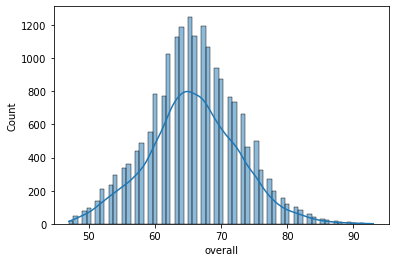

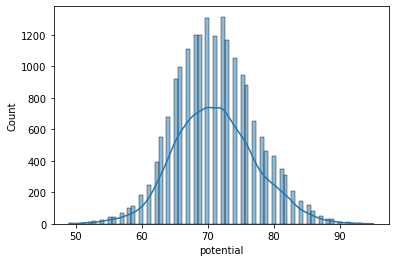

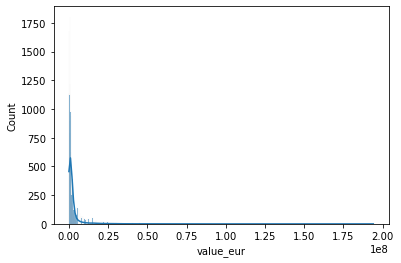

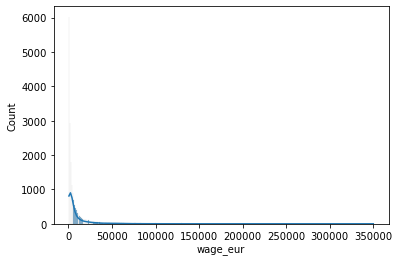

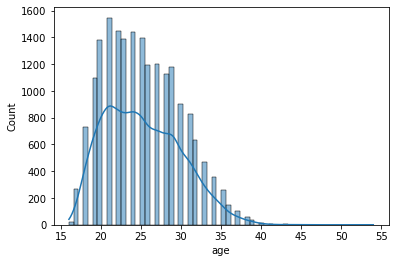

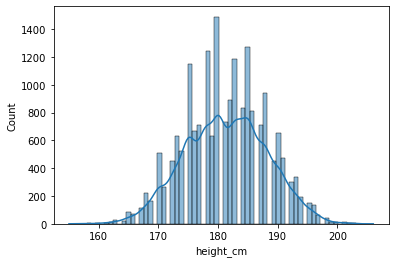

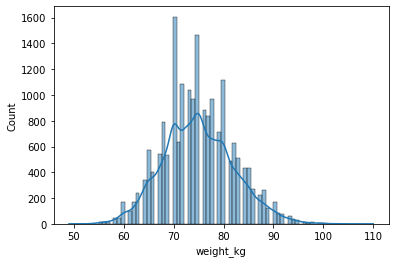

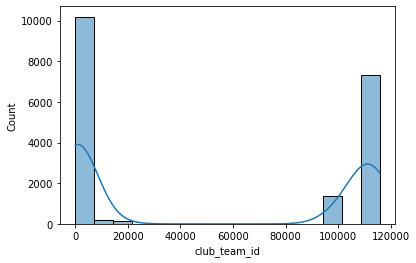

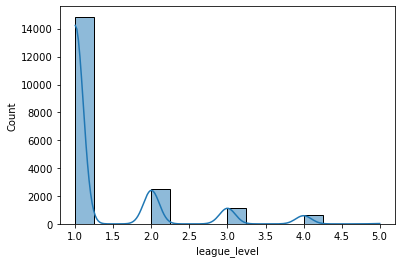

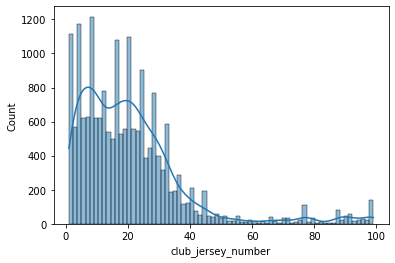

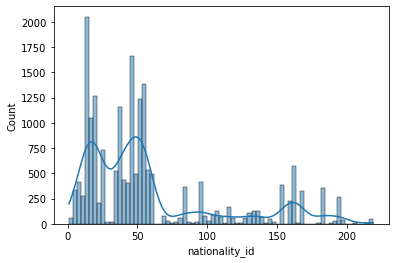

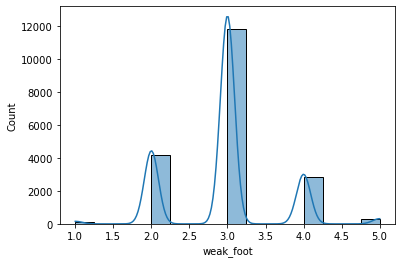

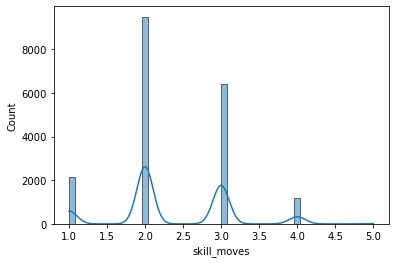

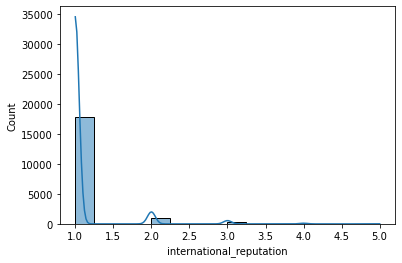

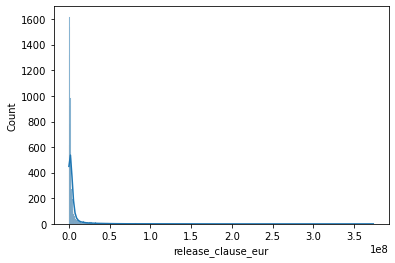

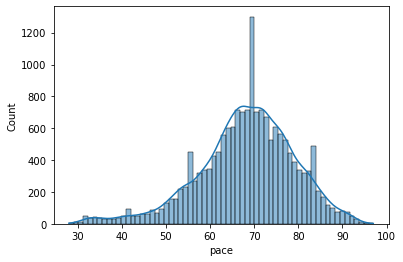

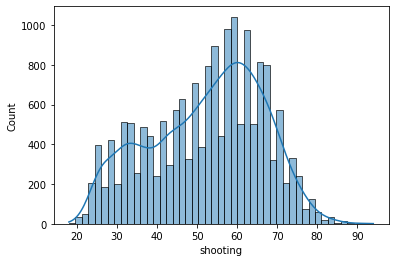

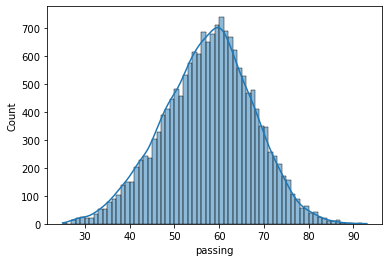

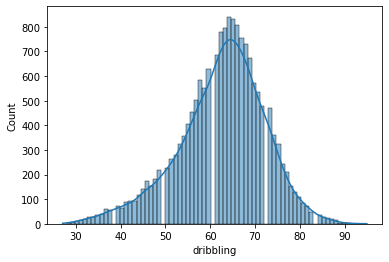

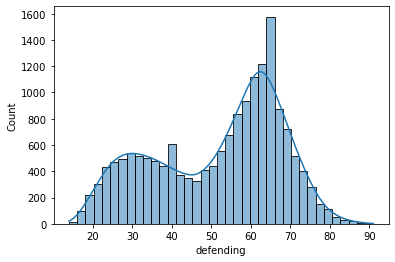

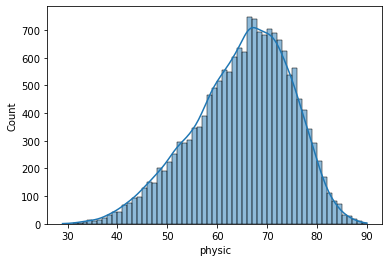

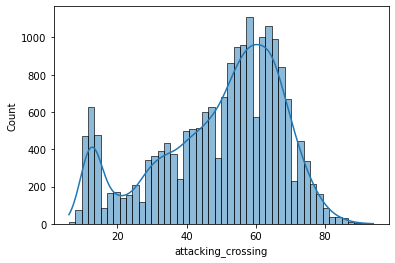

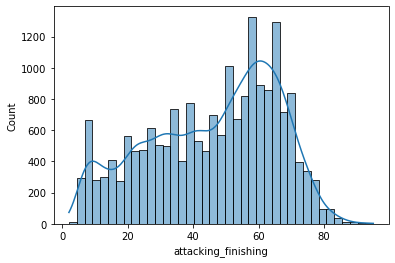

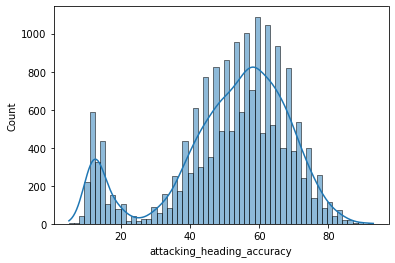

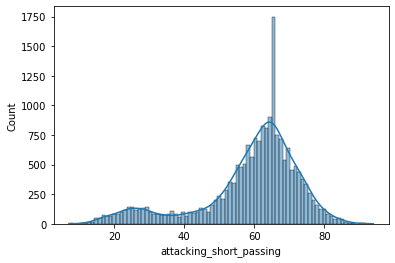

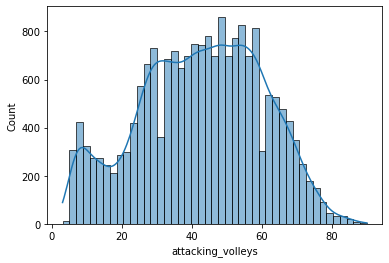

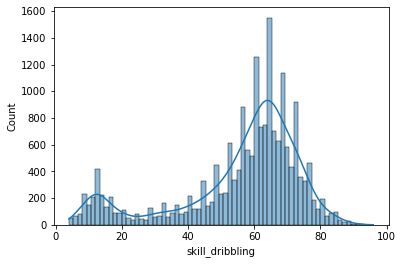

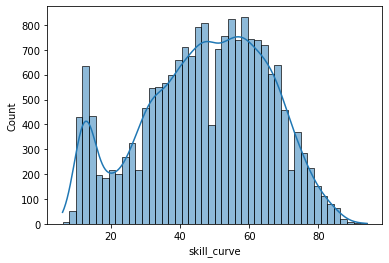

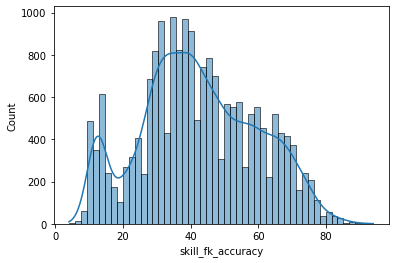

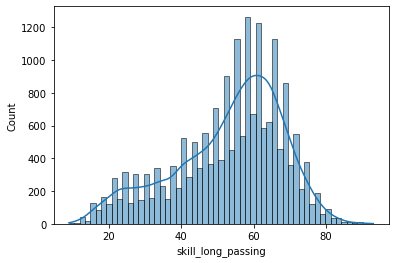

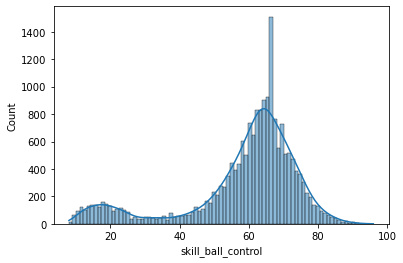

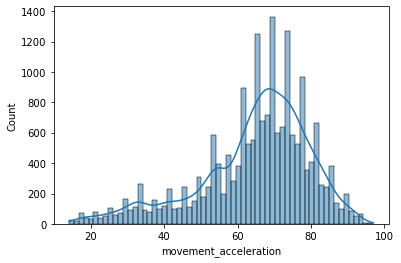

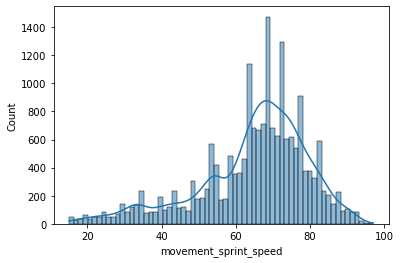

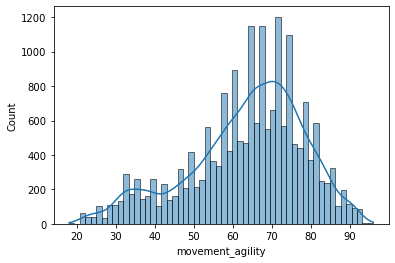

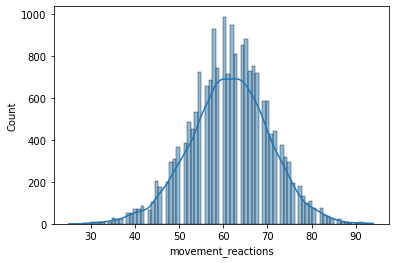

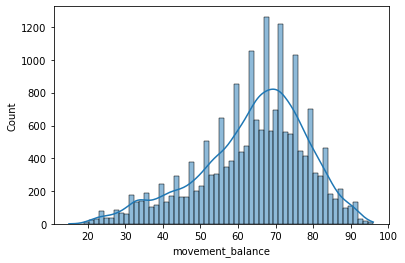

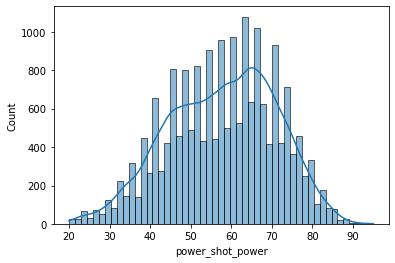

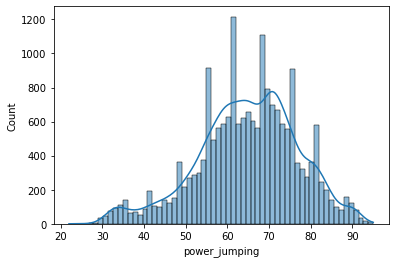

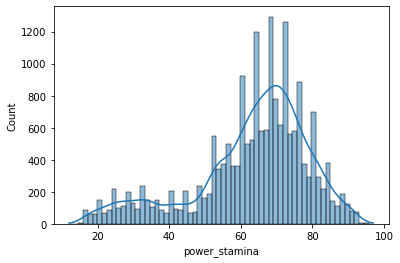

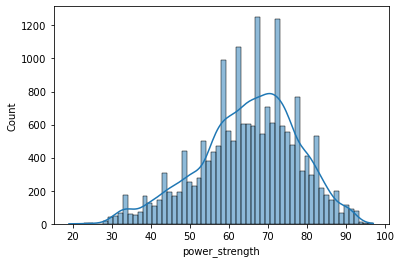

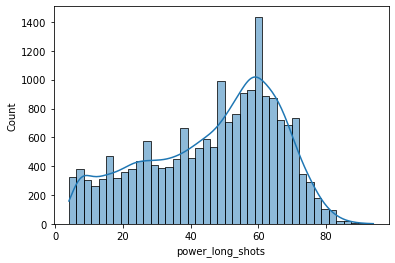

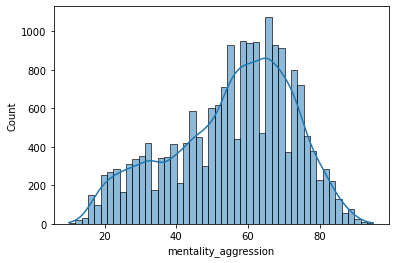

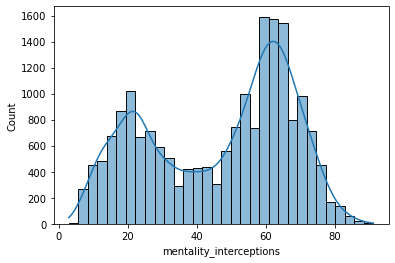

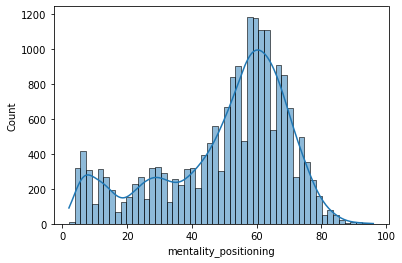

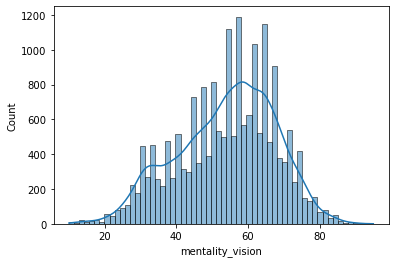

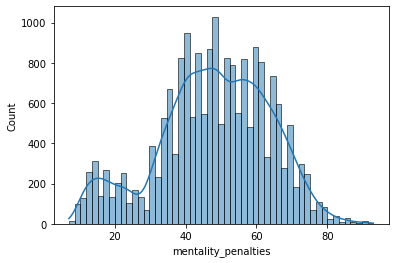

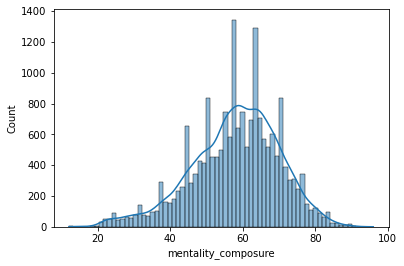

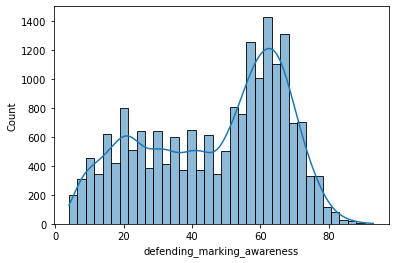

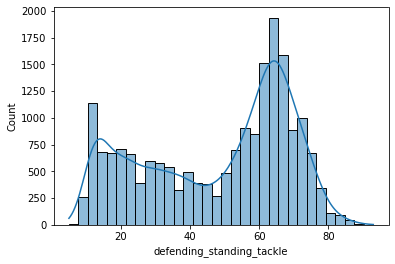

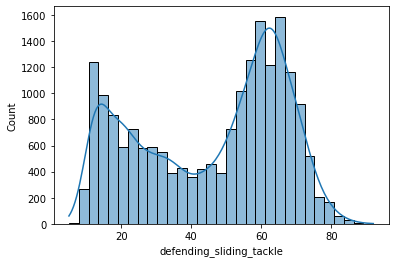

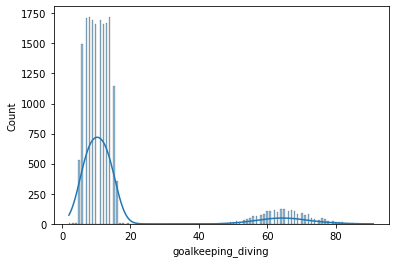

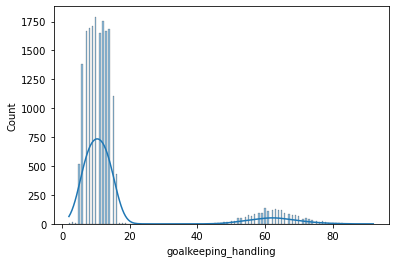

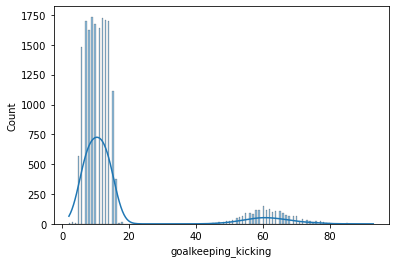

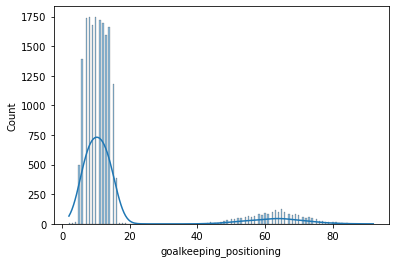

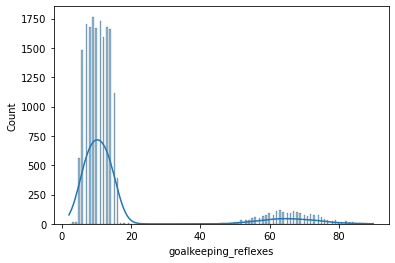

In [15]:
for i in df.select_dtypes(include = "number").columns:
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

Отобразим график "ящик с усами" для визуализации распределения с точки зрения медианы, квантией 25- и 75-% и выбросов

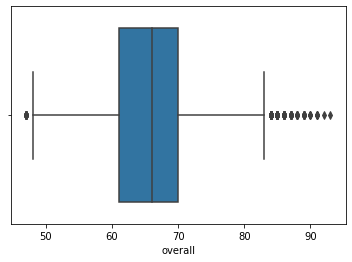

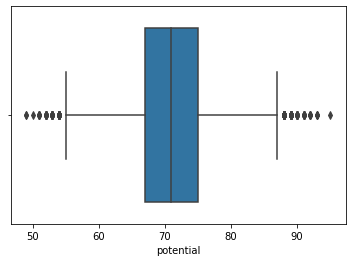

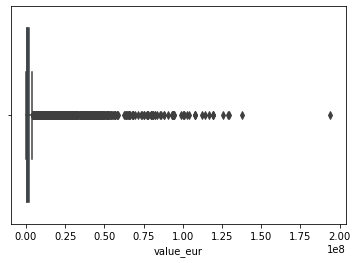

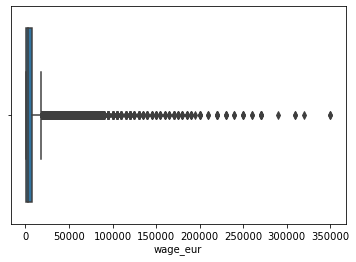

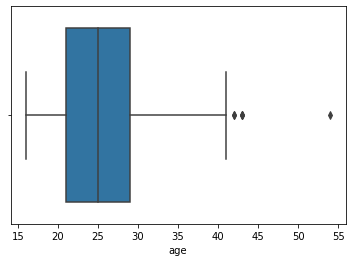

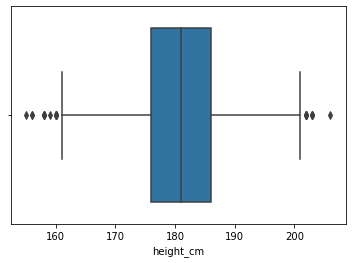

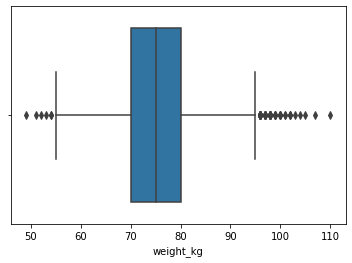

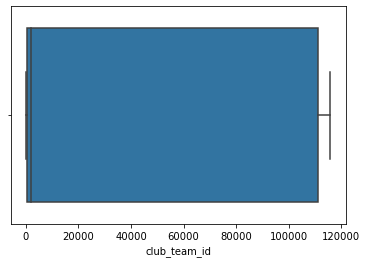

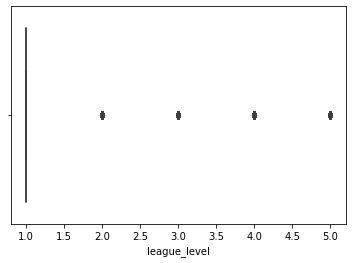

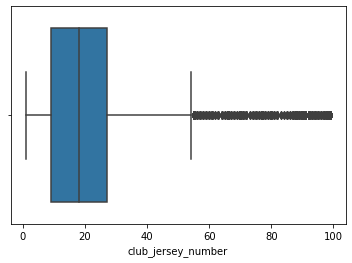

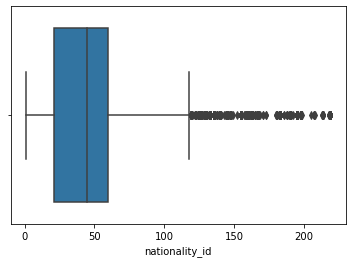

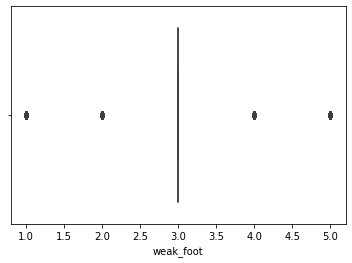

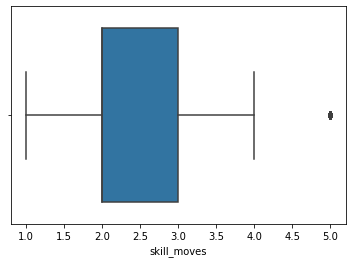

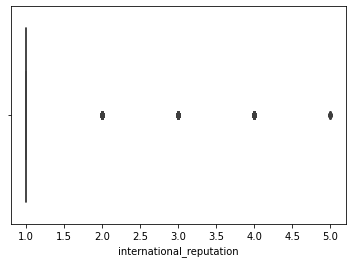

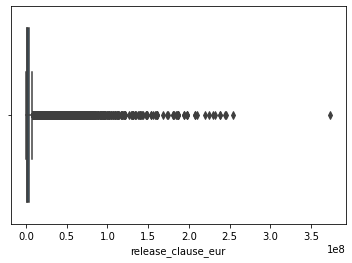

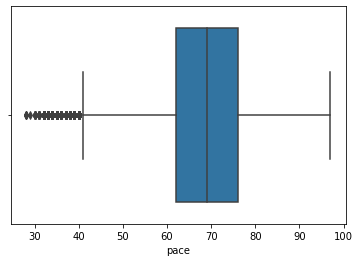

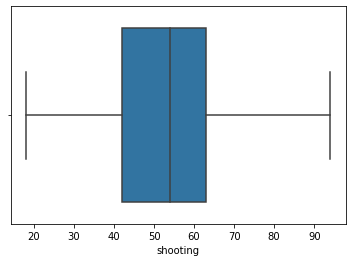

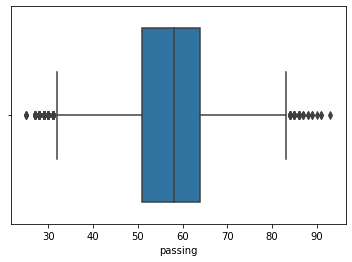

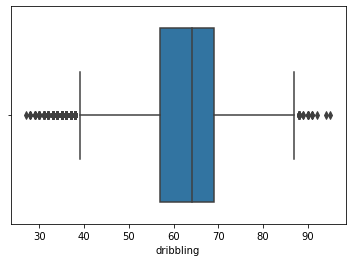

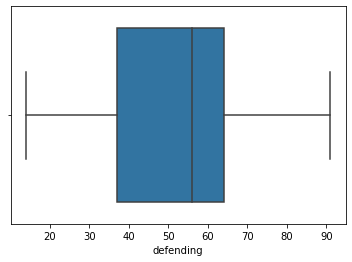

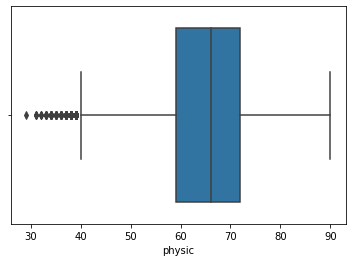

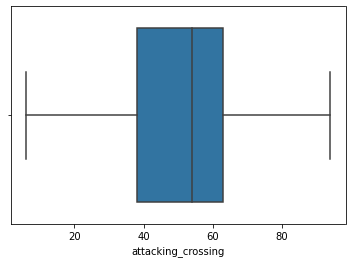

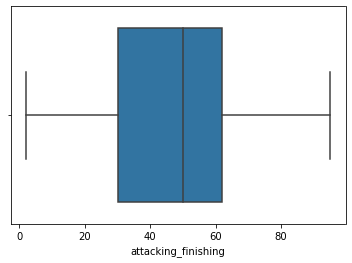

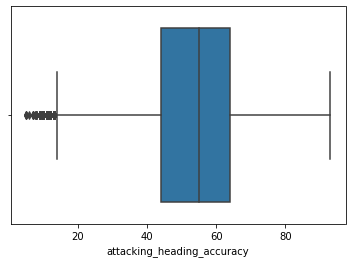

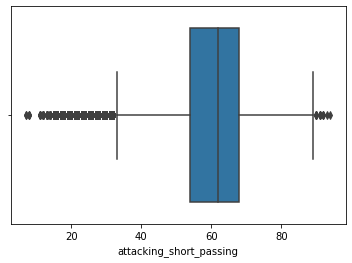

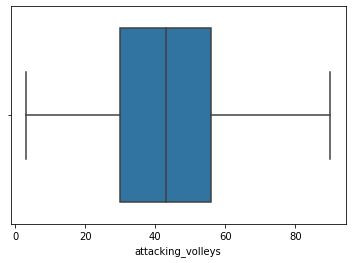

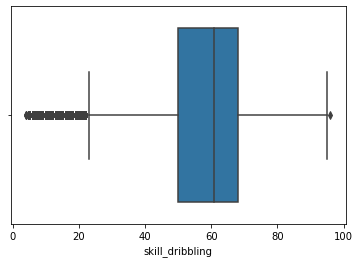

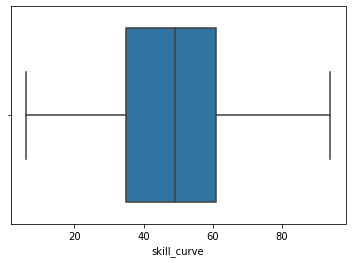

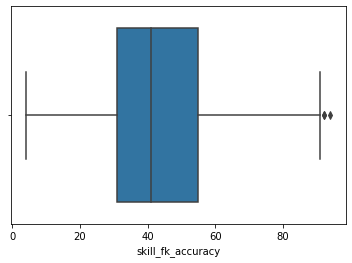

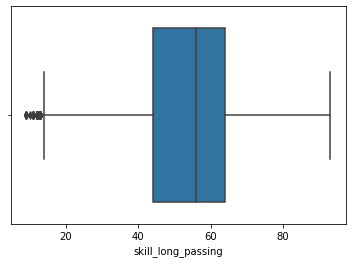

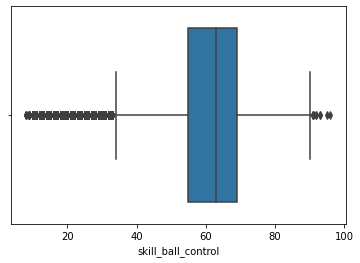

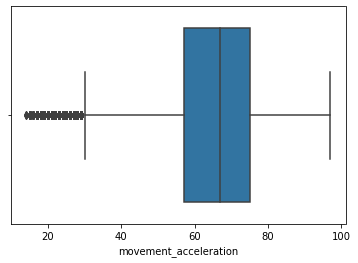

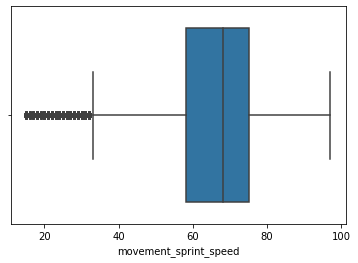

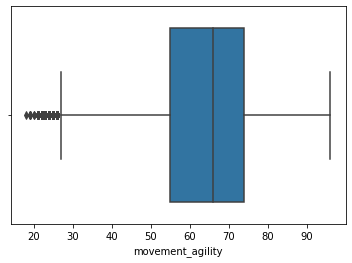

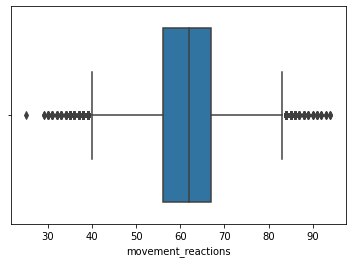

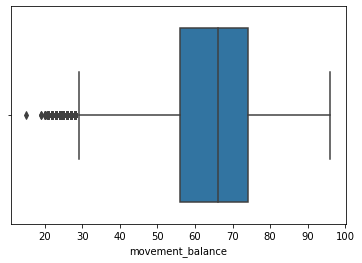

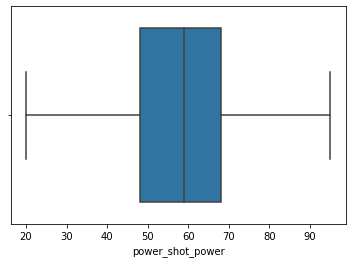

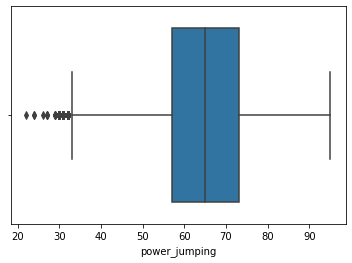

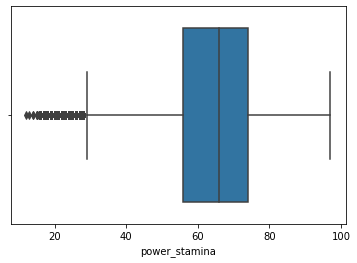

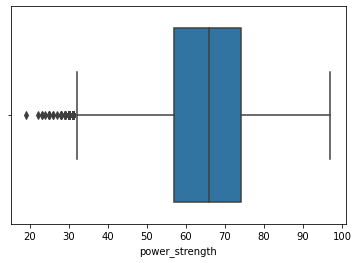

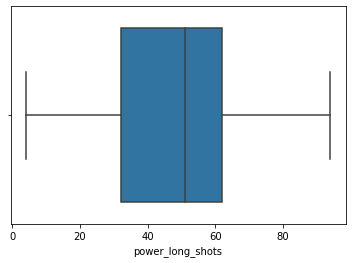

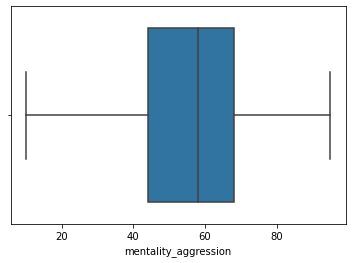

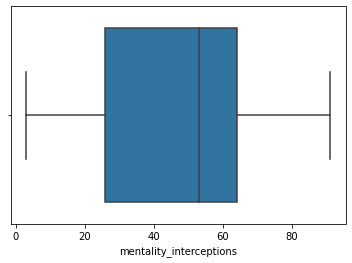

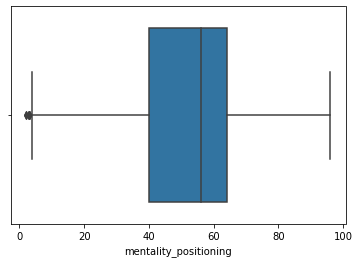

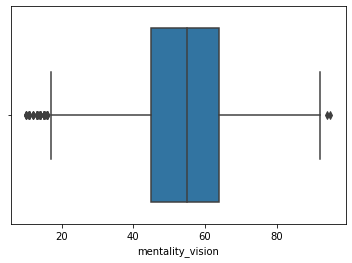

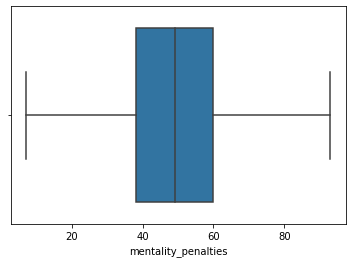

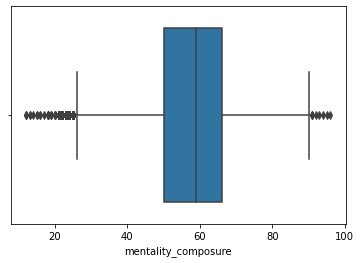

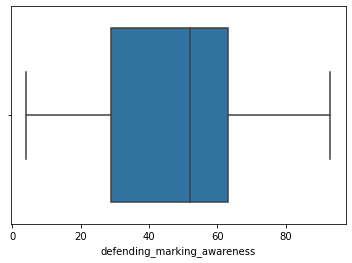

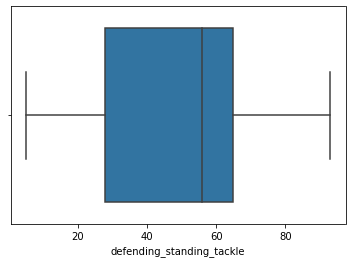

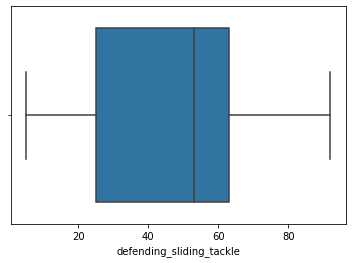

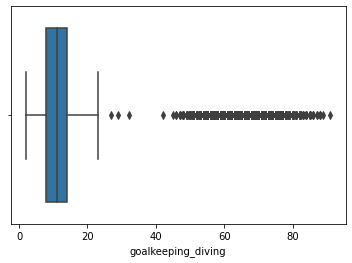

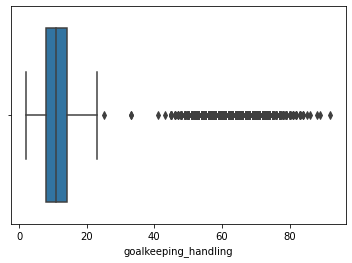

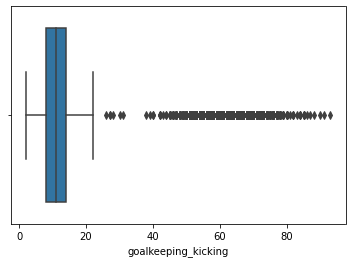

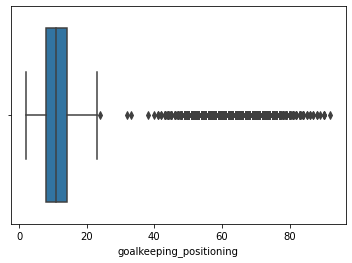

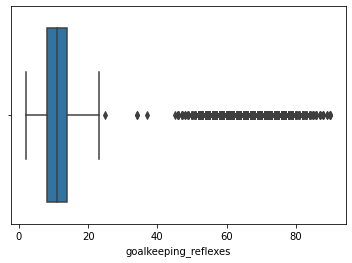

In [16]:
for i in df.select_dtypes(include = "number").columns:
    sns.boxplot(data = df, x = i)
    plt.show()

Строим точечную диаграмму для определения взаимосвязей между данными (у нас рейтинг - зависимый фактор, остальные - независимые). Для простоты сначала выведем список числовых столбцов, потом будем работать с ними

In [17]:
df.select_dtypes(include = "number").columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'club_team_id', 'league_level', 'club_jersey_number',
       'nationality_id', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
    

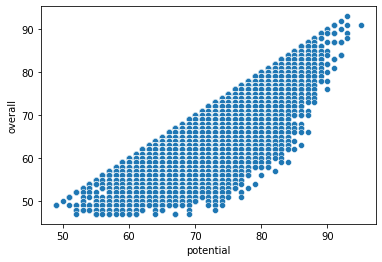

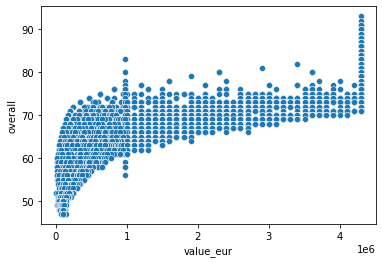

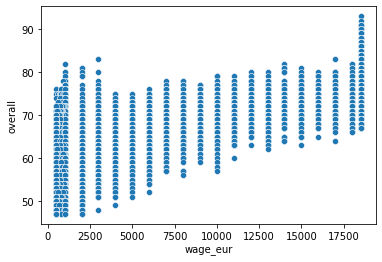

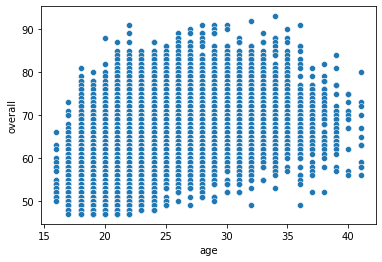

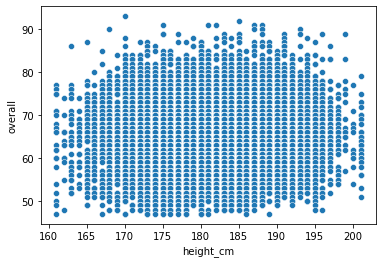

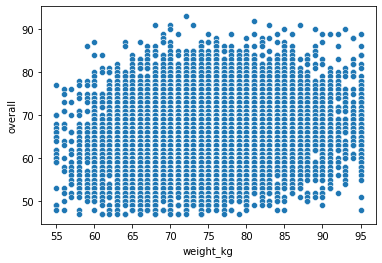

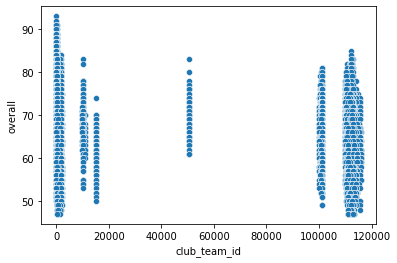

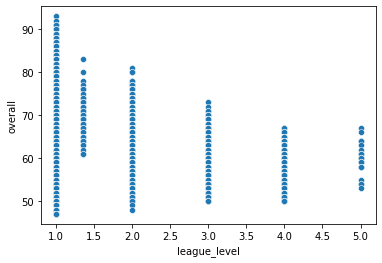

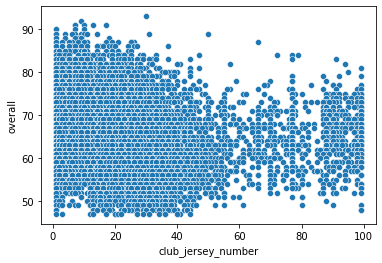

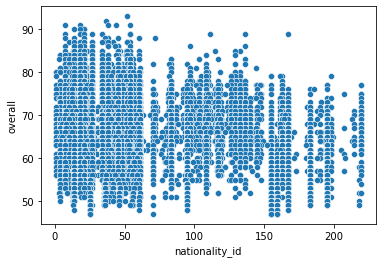

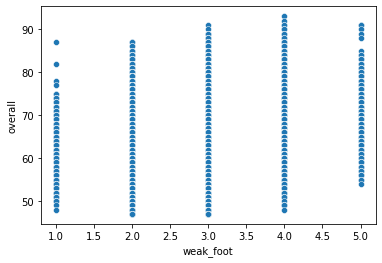

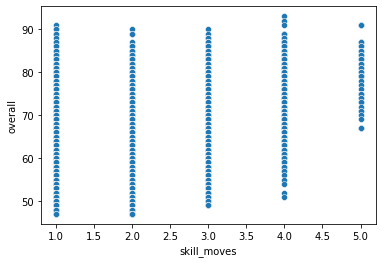

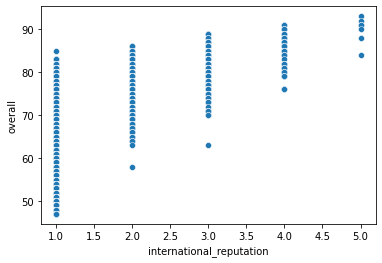

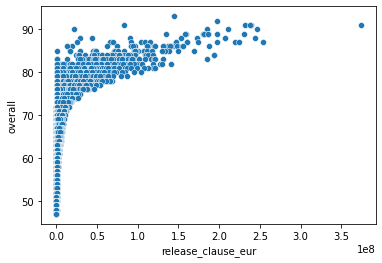

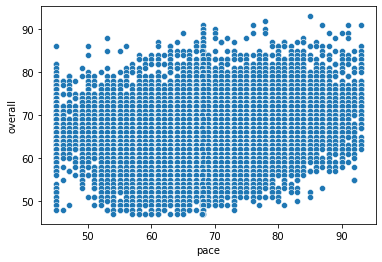

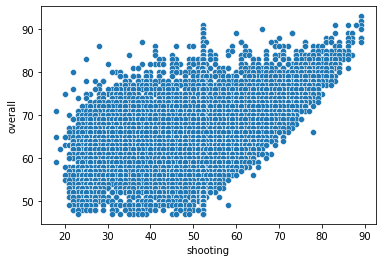

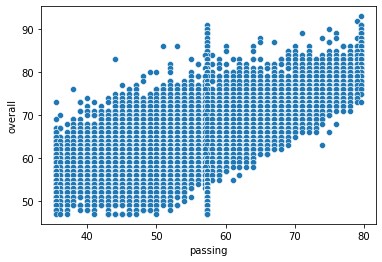

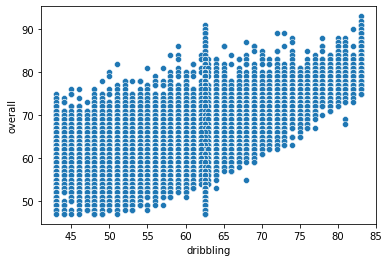

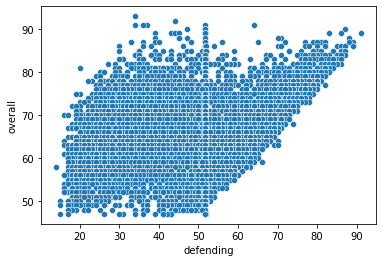

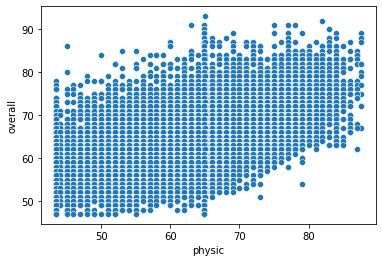

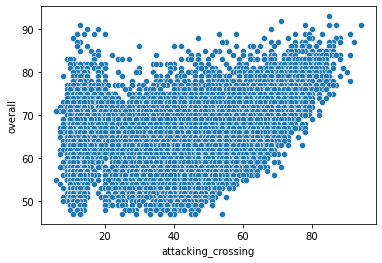

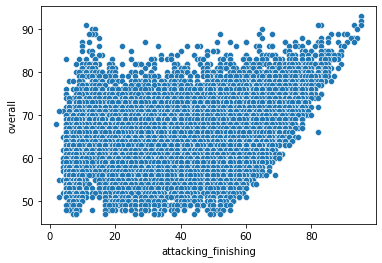

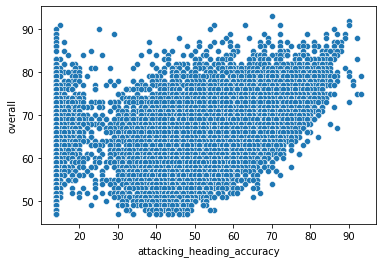

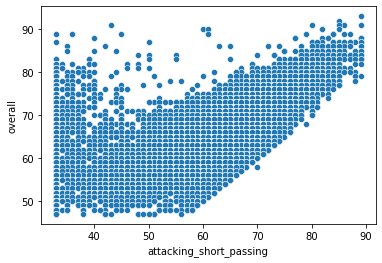

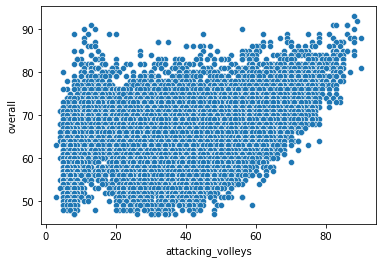

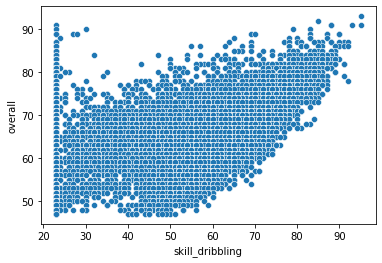

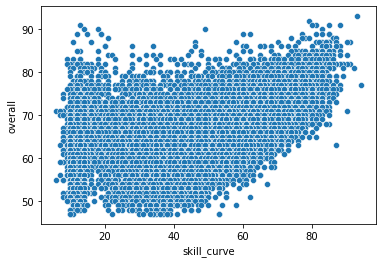

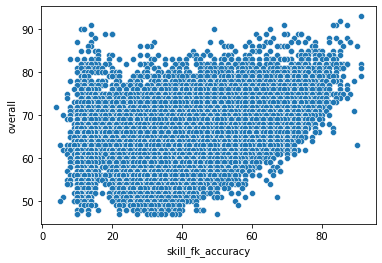

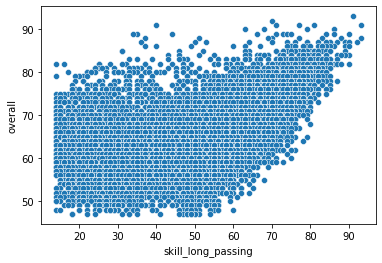

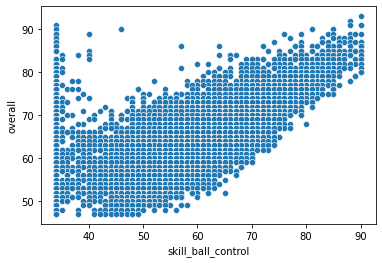

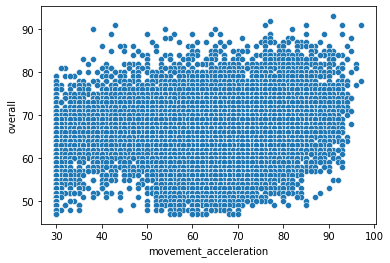

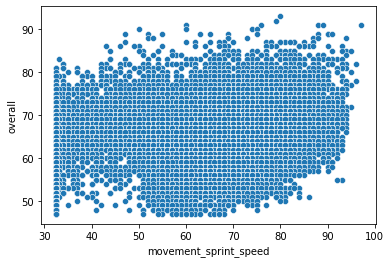

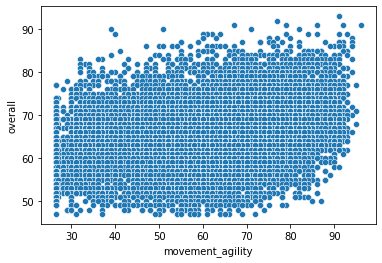

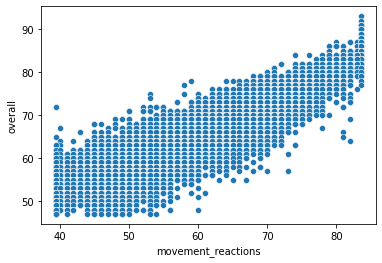

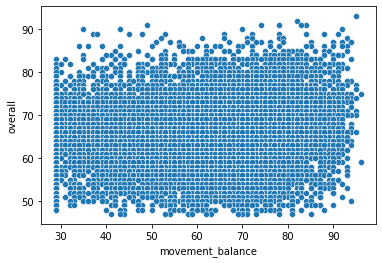

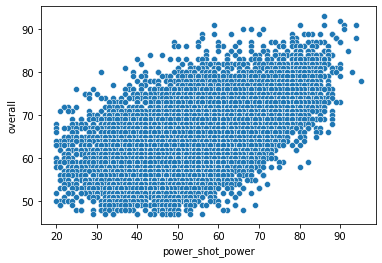

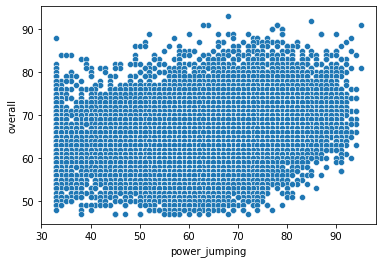

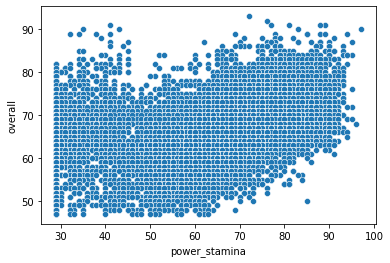

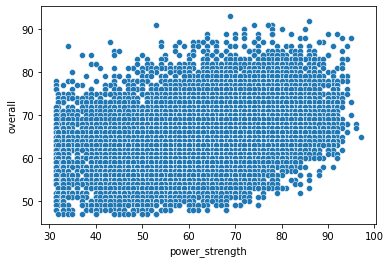

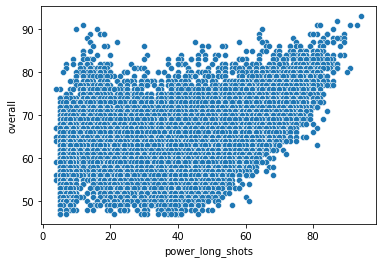

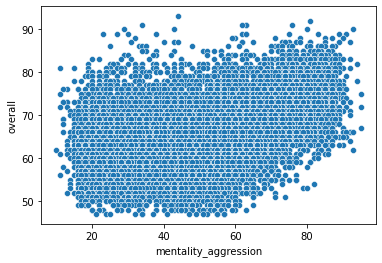

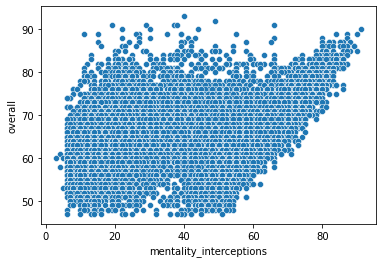

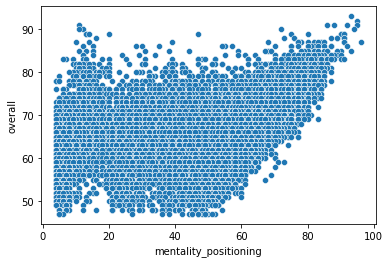

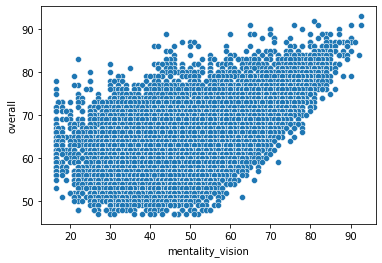

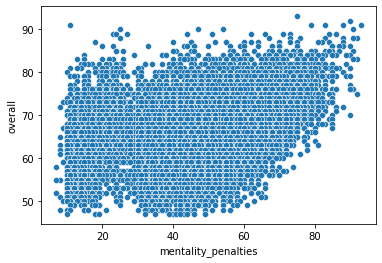

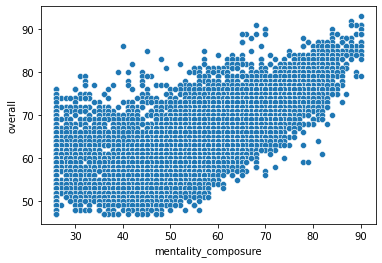

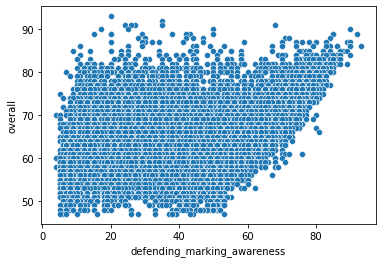

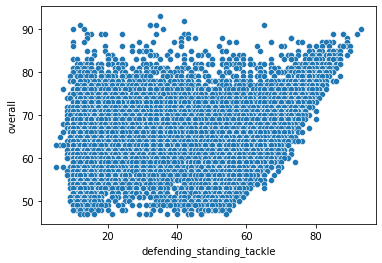

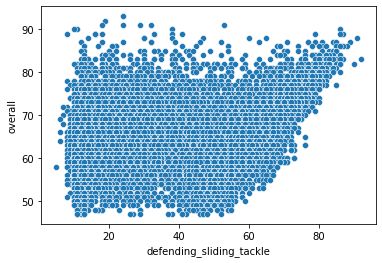

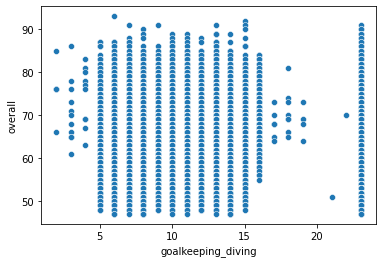

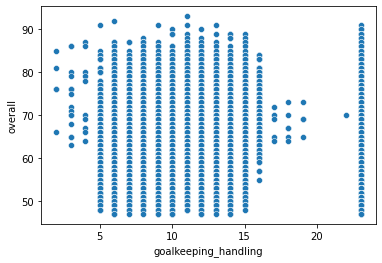

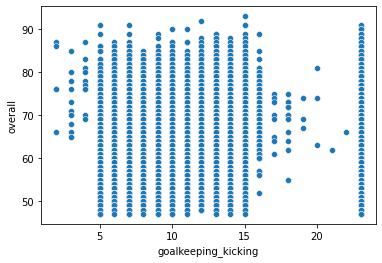

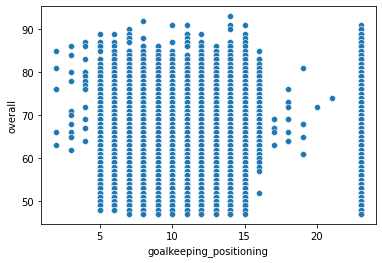

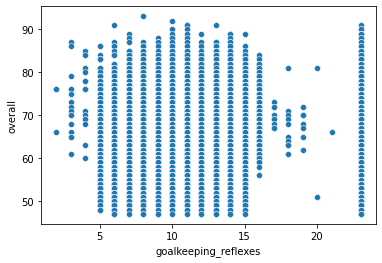

In [46]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('overall')

for i in numeric_columns:
    sns.scatterplot(data = df, x = i, y = 'overall')
    plt.show()

Построим Q-Plot график для сравнения распределения наших данных с нормальным распределением

Перебираются столбцы из списка, например, 'potential', 'value_eur', 'wage_eur' и так далее.

Для каждого столбца вызывается probplot(df[i], plot=plt). Эта функция строит Q-Plot график для данных в столбце. Q-Plot график представляет собой график квантилей (процентилей) выборки по оси x и квантилей теоретического распределения по оси y.

После построения Q-Plot графика, добавляются заголовки с названием столбца: plt.title(f'Q-Plot for {i}').

Затем используется plt.show() для отображения построенного Q-Plot графика.

Что касается "теоретического распределения", то у нас по умолчанию используется нормальное (гауссово) распределение (norm). Q-Plot график сравнивает квантили нашей выборки с квантилями теоретического распределения (в данном случае, нормального). Если точки на Q-Plot графике следуют прямой линии, это указывает на то, что данные хорошо соответствуют теоретическому распределению. Отклонения от прямой линии могут свидетельствовать о несоответствии распределения.

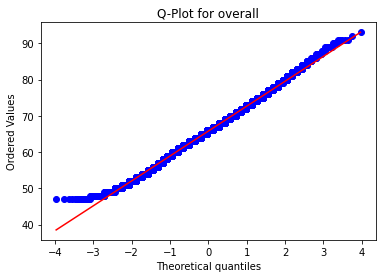

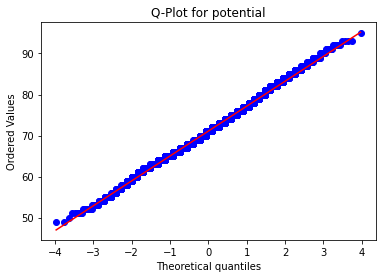

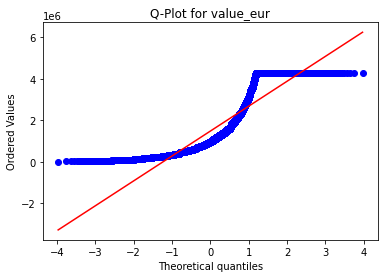

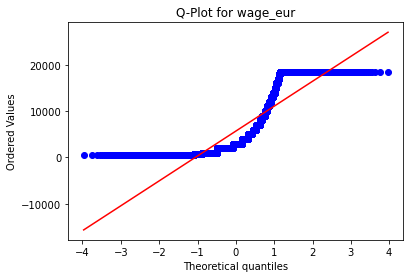

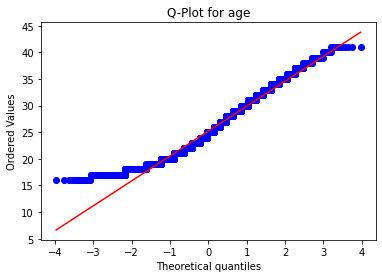

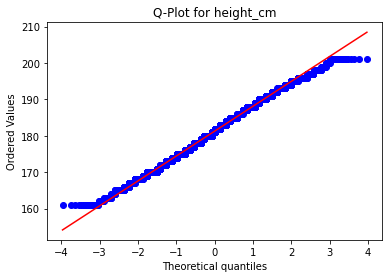

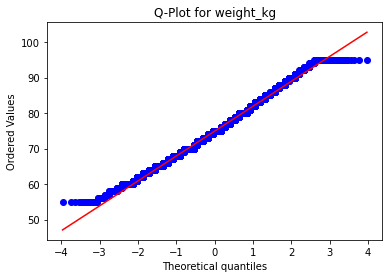

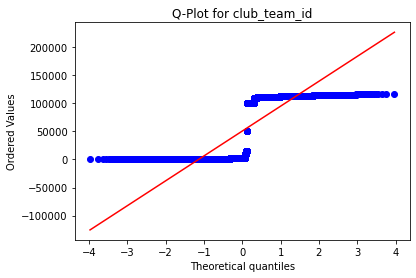

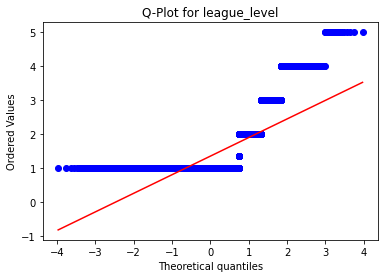

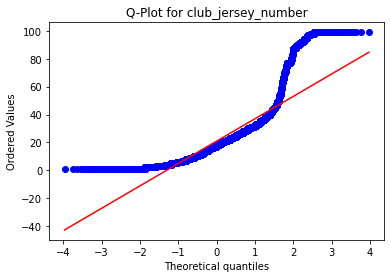

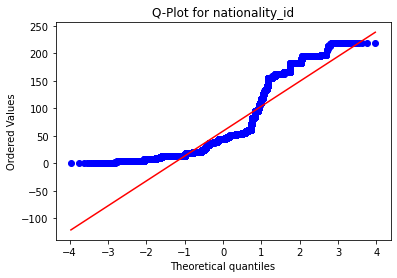

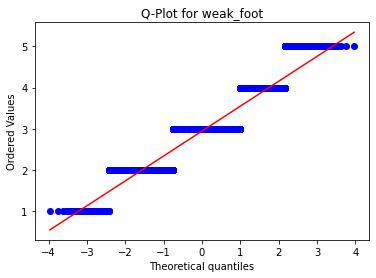

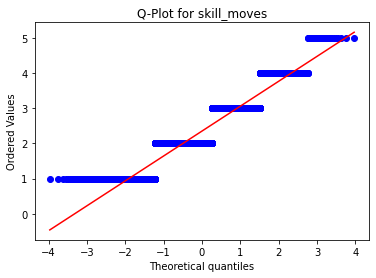

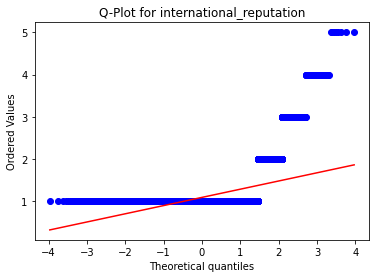

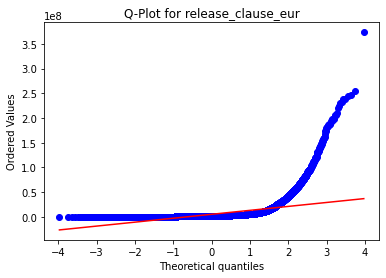

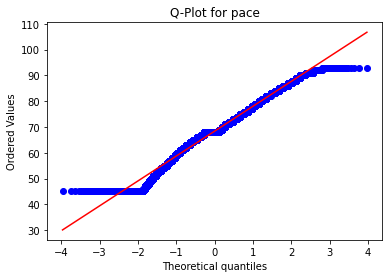

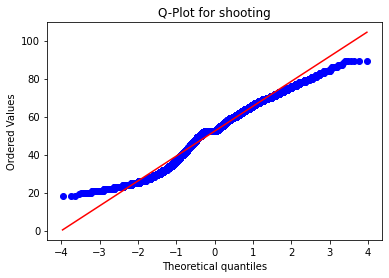

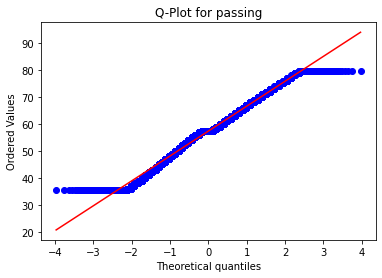

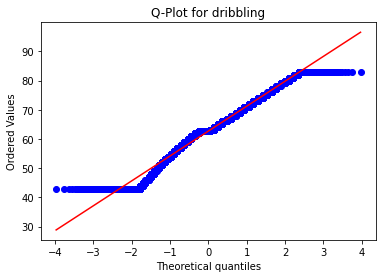

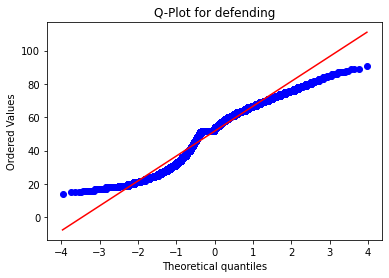

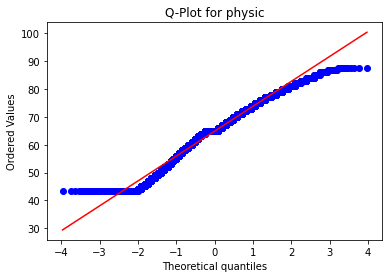

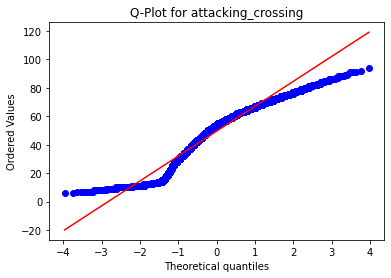

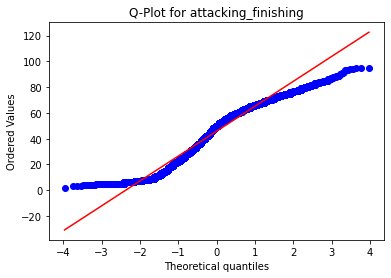

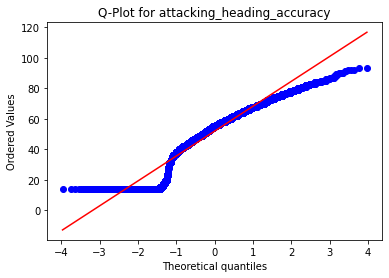

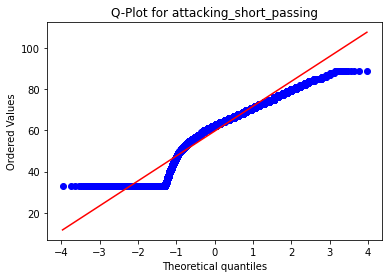

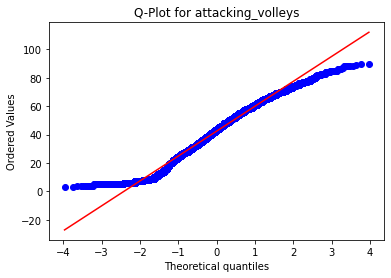

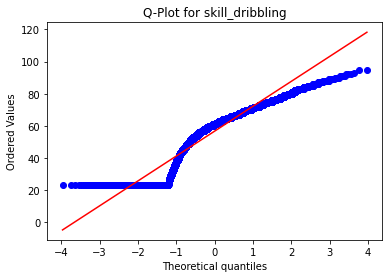

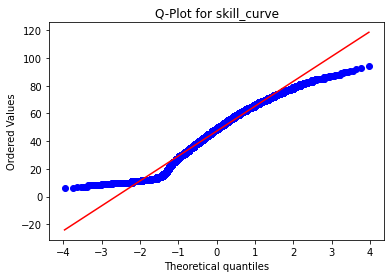

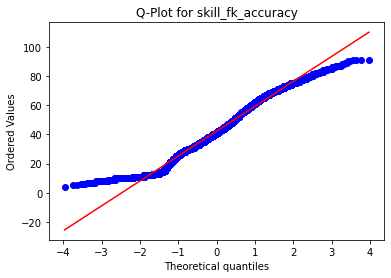

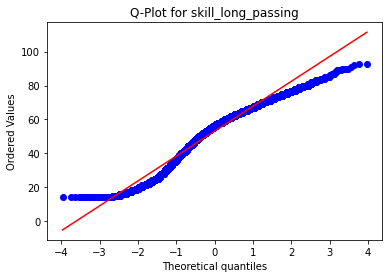

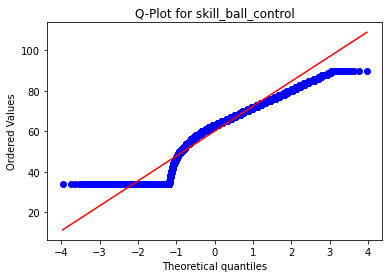

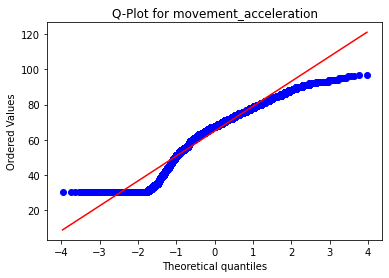

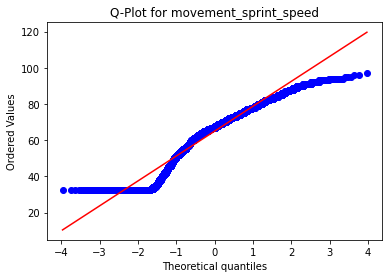

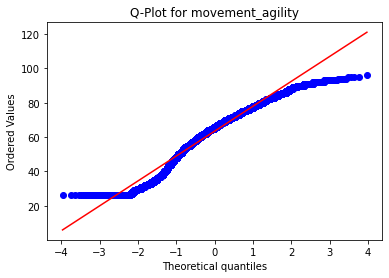

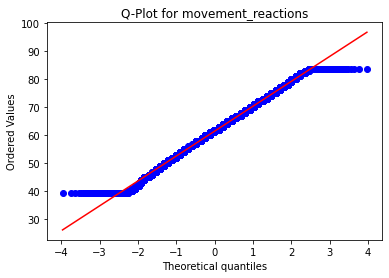

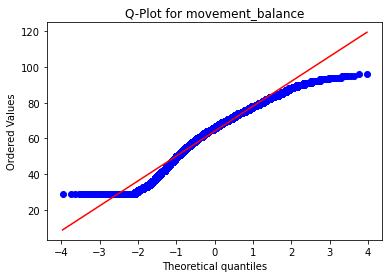

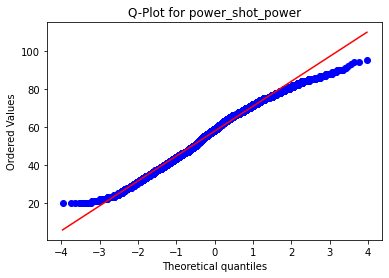

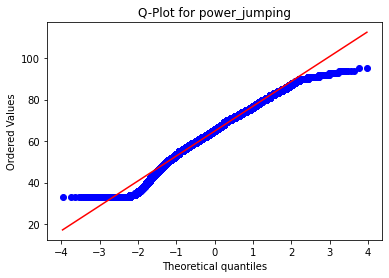

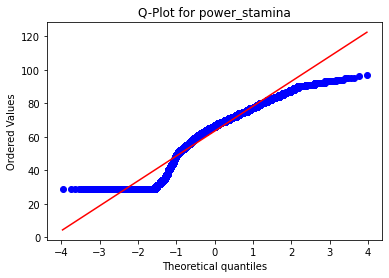

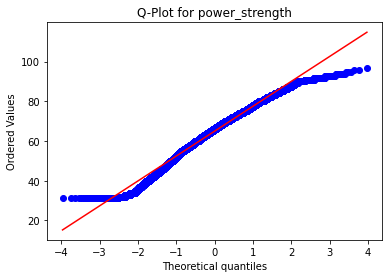

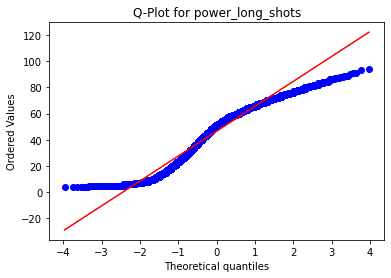

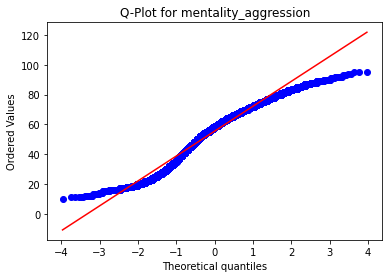

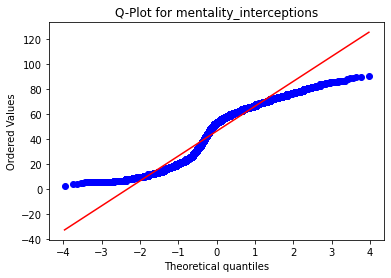

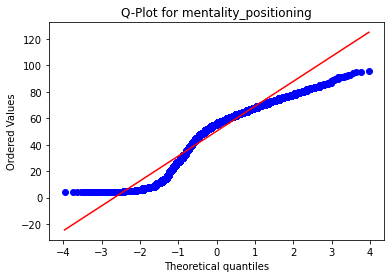

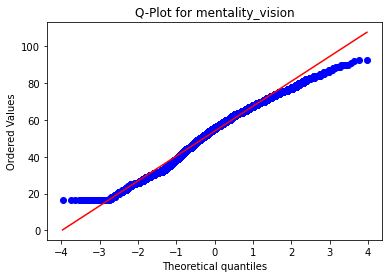

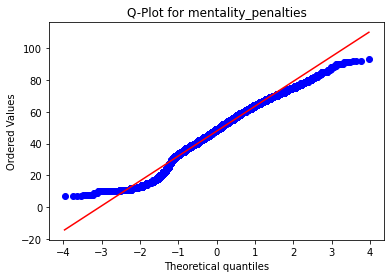

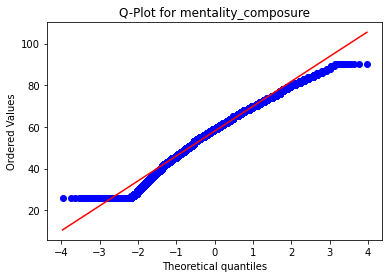

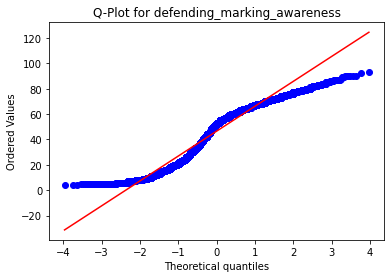

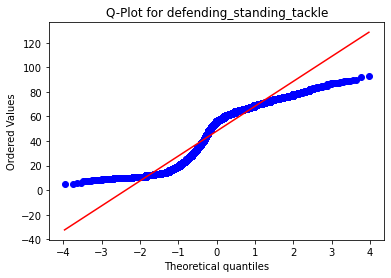

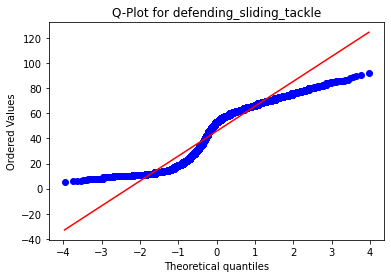

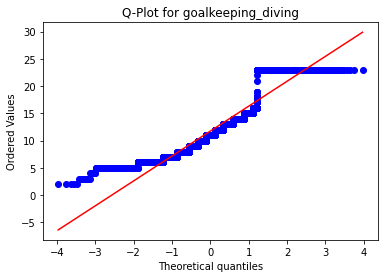

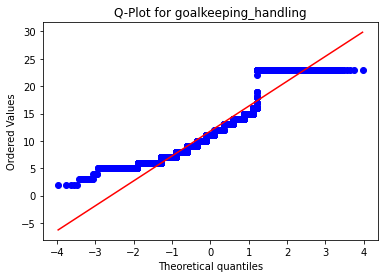

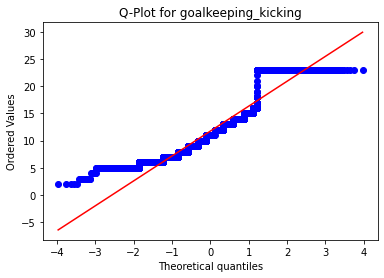

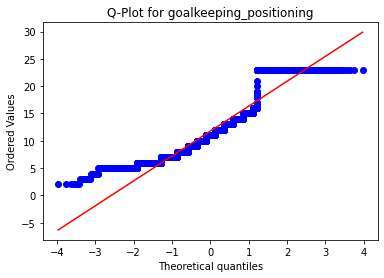

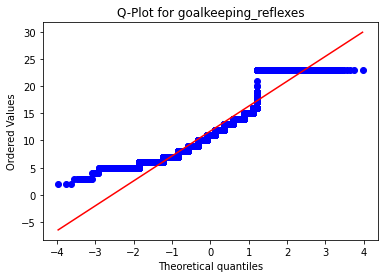

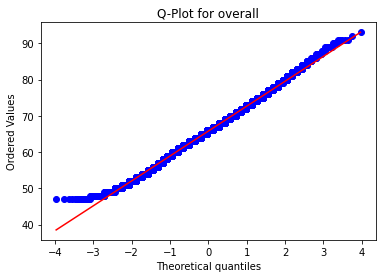

In [49]:
from scipy.stats import probplot, norm

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.append('overall')

for i in numeric_columns:
    probplot_data = probplot(df[i], plot=plt)
    plt.title(f'Q-Plot for {i}')
    plt.show()

Теперь для визуализации взаимосвязи данных построим тепловую карту. Но для начала выведем матрицу корреляции, которая, по сути, является табличным представлением тепловой карты

In [20]:
df_corr = df.select_dtypes(include = "number").corr()
df_corr

overall  potential  value_eur  wage_eur  \
overall                      1.000000   0.644275   0.554684  0.601764   
potential                    0.644275   1.000000   0.527738  0.497611   
value_eur                    0.554684   0.527738   1.000000  0.823527   
wage_eur                     0.601764   0.497611   0.823527  1.000000   
age                          0.459451  -0.264142   0.042886  0.158490   
height_cm                    0.042787   0.004403   0.010291  0.028062   
weight_kg                    0.150324  -0.016912   0.035188  0.066208   
club_team_id                -0.226640  -0.330928  -0.191468 -0.240514   
league_level                -0.179032  -0.153075  -0.117917 -0.126592   
club_jersey_number          -0.186166   0.009784  -0.067670 -0.069797   
nationality_id              -0.168315  -0.247198  -0.083983 -0.092472   
weak_foot                    0.223762   0.157053   0.149757  0.160240   
skill_moves                  0.376226   0.283746   0.257232  0.272319   
international_reputation     0.470647   0.357283   0.632181  0.675637   
release_clause_eur           0.545197   0.537715   0.995460  0.821330   
pace                         0.174695   0.258817   0.181934  0.134479   
shooting                     0.489623   0.287862   0.290294  0.312219   
passing                      0.715001   0.437655   0.404774  0.438336   
dribbling                    0.666402   0.490270   0.404812  0.421867   
defending                    0.346760   0.162151   0.147359  0.178856   
physic                       0.529234   0.155740   0.215105  0.249843   
attacking_crossing           0.401356   0.243757   0.227414  0.253123   
attacking_finishing          0.338746   0.230814   0.217691  0.229687   
attacking_heading_accuracy   0.343901   0.192825   0.165921  0.207326   
attacking_short_passing      0.516788   0.367162   0.297419  0.324420   
attacking_volleys            0.380942   0.235766   0.238366  0.264481   
skill_dribbling              0.384351   0.311396   0.240916  0.255204   
skill_curve                  0.420423   0.270217   0.252820  0.281428   
skill_fk_accuracy            0.381030   0.207769   0.214721  0.245725   
skill_long_passing           0.498216   0.324791   0.278721  0.310768   
skill_ball_control           0.460411   0.347172   0.269854  0.293376   
movement_acceleration        0.194044   0.232621   0.157690  0.133496   
movement_sprint_speed        0.205736   0.235577   0.164682  0.142775   
movement_agility             0.270279   0.223385   0.176597  0.171261   
movement_reactions           0.871823   0.522483   0.492741  0.539616   
movement_balance             0.123700   0.136890   0.117887  0.105672   
power_shot_power             0.561180   0.332292   0.301723  0.344529   
power_jumping                0.284689   0.096992   0.118294  0.148923   
power_stamina                0.385150   0.199743   0.198771  0.199667   
power_strength               0.364366   0.073567   0.128684  0.162081   
power_long_shots             0.410010   0.243294   0.231585  0.257850   
mentality_aggression         0.400161   0.191501   0.183251  0.225225   
mentality_interceptions      0.316470   0.157728   0.141060  0.170430   
mentality_positioning        0.358562   0.233070   0.224097  0.240612   
mentality_vision             0.523025   0.345298   0.324453  0.347141   
mentality_penalties          0.343690   0.208062   0.196231  0.228939   
mentality_composure          0.708867   0.426790   0.389065  0.437174   
defending_marking_awareness  0.312093   0.161288   0.140981  0.169093   
defending_standing_tackle    0.259773   0.156649   0.120724  0.144442   
defending_sliding_tackle     0.233589   0.140869   0.103512  0.125646   
goalkeeping_diving          -0.010990  -0.043093  -0.022090 -0.024234   
goalkeeping_handling        -0.011080  -0.044989  -0.022474 -0.024443   
goalkeeping_kicking         -0.012986  -0.047030  -0.021599 -0.024328   
goalkeeping_positioning     -0.002485  -0.040184  -0.021292 -0.022675   
goalkeeping_ref

Для болшей наглядности и информативности тепловой карты сначала увеличим её размер, затем отобразим на ней значения из таблицы корреляции

<AxesSubplot:>

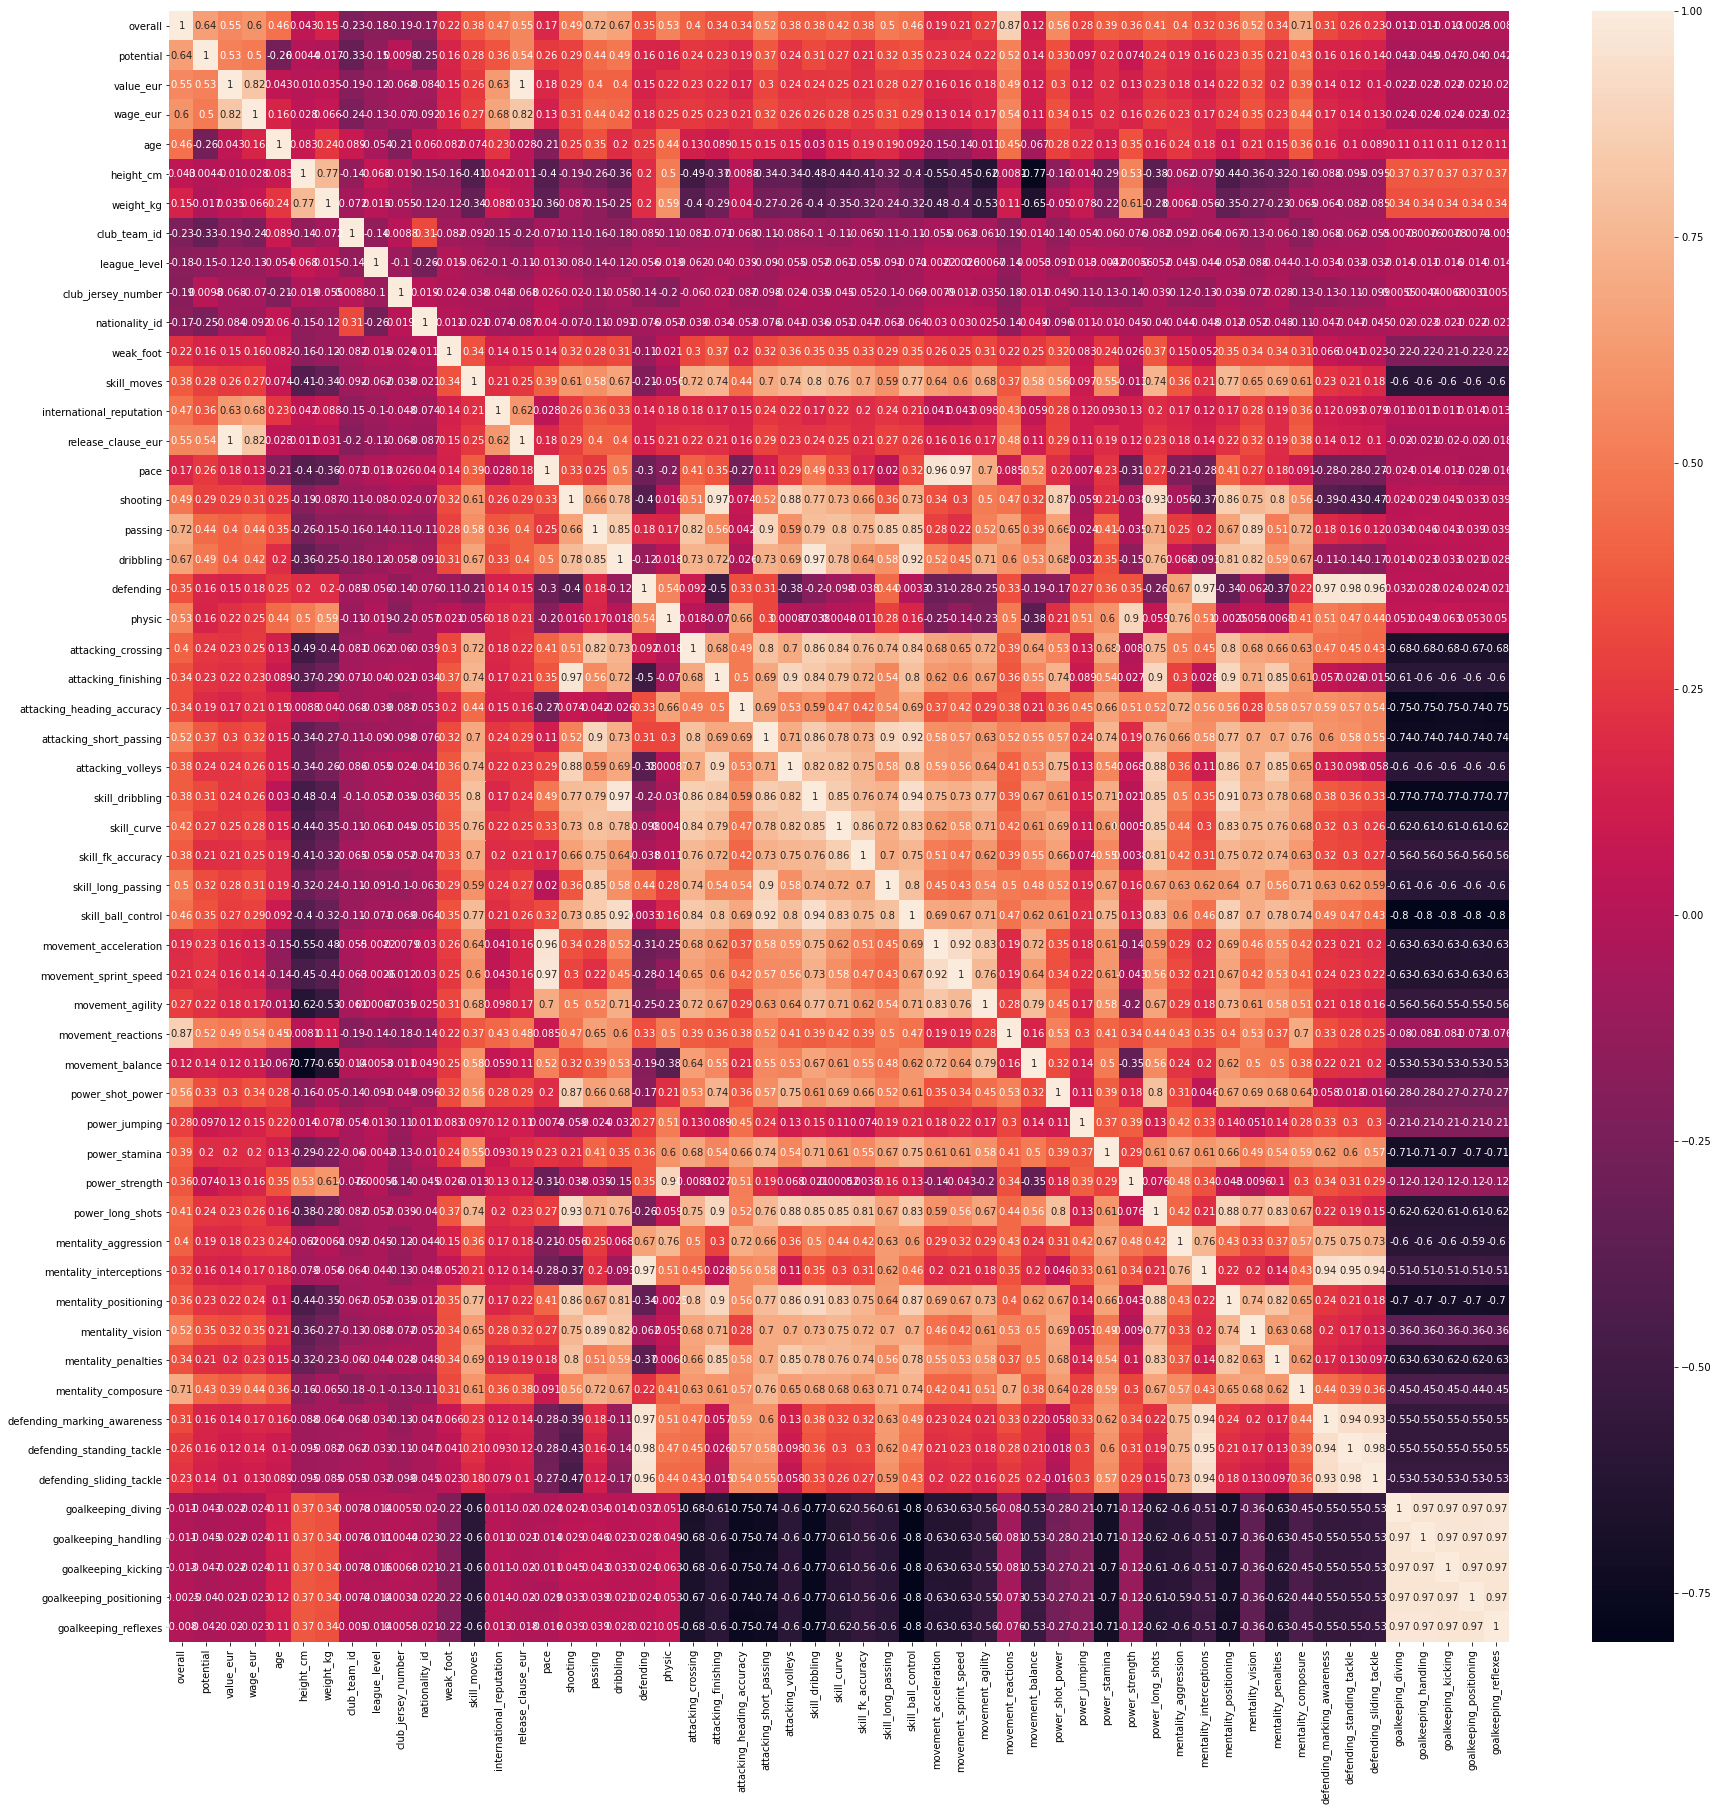

In [21]:
plt.figure(figsize = (30, 30))
sns.heatmap(data = df_corr, annot = True)

### Обработка недостающих значений

Вообще для заполнения пропущенных значений можно использовать различные подходы: выбирать для них медиану, среднее, моду или использовать некоторый специальный алгоритм

Снова для удобства выведем информацию о пустых данных в столбцах

In [22]:
df.isnull().sum()

short_name                        0
overall                           0
potential                         0
value_eur                        74
wage_eur                         61
age                               0
height_cm                         0
weight_kg                         0
club_team_id                     61
league_level                     61
position                         61
club_jersey_number               61
nationality_id                    0
weak_foot                         0
skill_moves                       0
international_reputation          0
release_clause_eur             1176
pace                           2132
shooting                       2132
passing                        2132
dribbling                      2132
defending                      2132
physic                         2132
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys           

Заменим пустые данные в столбцах трансферной стоимости футболиста, его зарплаты и величины отступных для расторжения/выкупа контракта. Эти столбцы вполне можно заменить медианным значением, считая футболистов с пропущенными данным "средними"

In [23]:
for i in ["value_eur", "wage_eur", "release_clause_eur"]:
    df[i].fillna(df[i].median(), inplace = True)

Проверим, что данные в этих столбцах заполнились

In [24]:
df.isnull().sum()

short_name                        0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
age                               0
height_cm                         0
weight_kg                         0
club_team_id                     61
league_level                     61
position                         61
club_jersey_number               61
nationality_id                    0
weak_foot                         0
skill_moves                       0
international_reputation          0
release_clause_eur                0
pace                           2132
shooting                       2132
passing                        2132
dribbling                      2132
defending                      2132
physic                         2132
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys           

Импортируем KNNImputer для реализации заполнения пропущенных значений методом k-ближайших соседей

In [25]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

Для каждого числового столбца применим этот метод. По умолчанию в KNNImputer используется параметр n_neighbors=5 (количество соседей равно 5). Это означает, что для каждого пропущенного значения в данных алгоритм KNN будет использовать 5 ближайших соседей для заполнения ячейки

In [26]:
for i in df.select_dtypes(include = "number").columns:
    df[i] = impute.fit_transform(df[[i]])

Снова проверим заполненность данных в столбцах

In [27]:
df.isnull().sum()

short_name                      0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
age                             0
height_cm                       0
weight_kg                       0
club_team_id                    0
league_level                    0
position                       61
club_jersey_number              0
nationality_id                  0
weak_foot                       0
skill_moves                     0
international_reputation        0
release_clause_eur              0
pace                            0
shooting                        0
passing                         0
dribbling                       0
defending                       0
physic                          0
attacking_crossing              0
attacking_finishing             0
attacking_heading_accuracy      0
attacking_short_passing         0
attacking_volleys               0
skill_dribbling                 0
skill_curve   

Остались пропущенные данные в столбце "позиция". Заполним эти пропуски значением "Unknown", потому что предсказать позицию можно только методами машинного обучения по показателям игрока, а пока мы только готовим датасет к обучению модели

In [28]:
df['position'].fillna('Unknown', inplace=True)

Снова проверим заполненность данных

In [29]:
df.isnull().sum()

short_name                     0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
age                            0
height_cm                      0
weight_kg                      0
club_team_id                   0
league_level                   0
position                       0
club_jersey_number             0
nationality_id                 0
weak_foot                      0
skill_moves                    0
international_reputation       0
release_clause_eur             0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_a

Все данные заполнены, можно переходить к дальнейшей обработке данных

### Обработка выбросов

Не проводим для целевой, категориальных и дискретных переменных. В методе мы находим 25- и 75-% квантили, вычисляем интерквантильный размах и на их основе вычисляем верхнюю и нижнюю границу значений столбца

In [30]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

Пример работы метода

In [31]:
wisker(df['overall'])

(47.5, 83.5)

Выведем столбцы для более удобной предобработки в дальнейшем 

In [32]:
df.columns

Index(['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level', 'position',
       'club_jersey_number', 'nationality_id', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defendin

Применим метод отсечения выбросов для числовых столбцов, за исключением рейтинга, так как это целевое значение

In [50]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('overall')
numeric_columns.remove('potential')

for i in numeric_columns:
    lw, uw = wisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

Выведем "ящики с усами", чтоб удостовериться в отсутствии выбросов. 

Первые две строки исключают предупреждения из вывода:

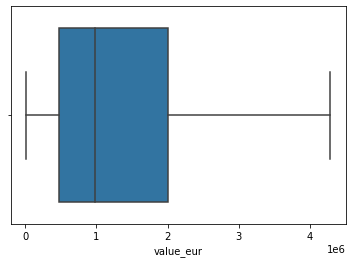

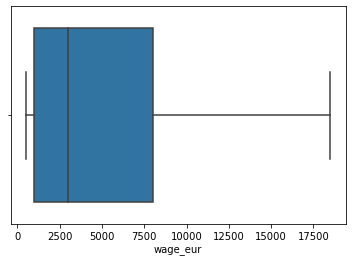

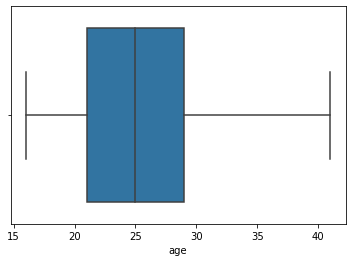

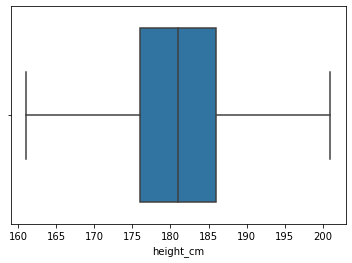

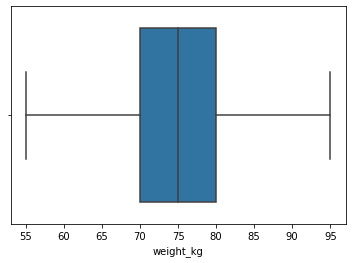

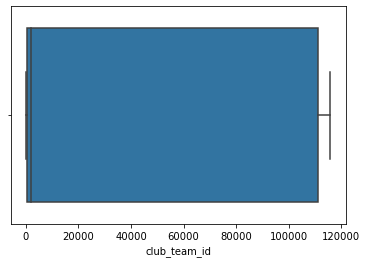

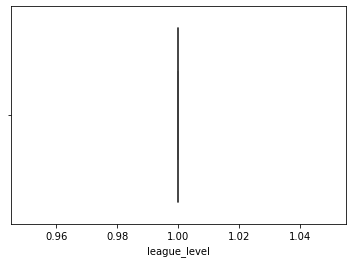

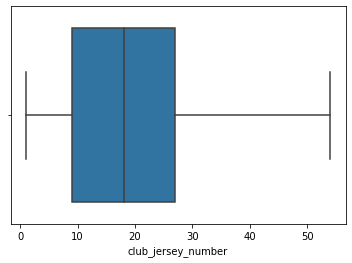

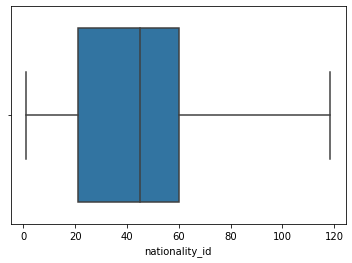

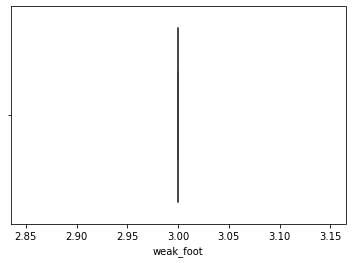

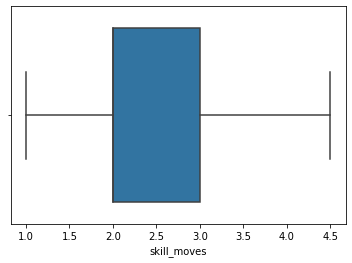

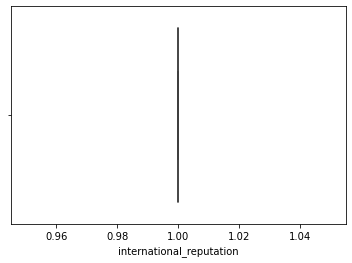

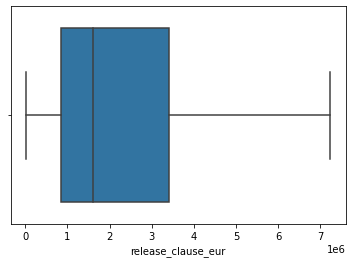

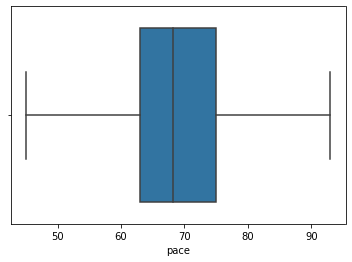

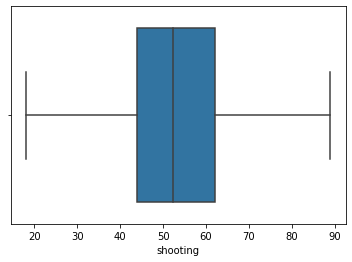

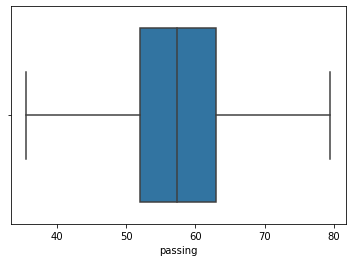

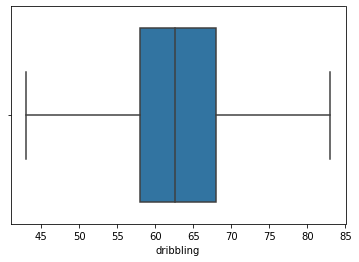

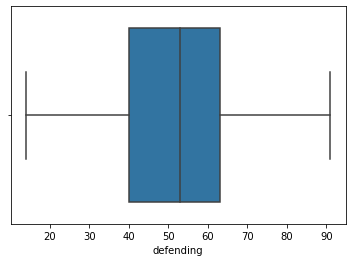

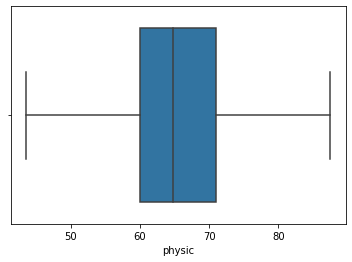

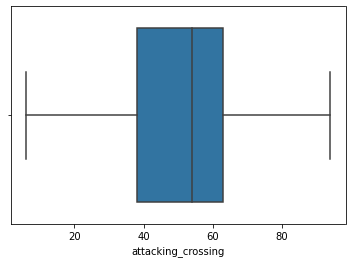

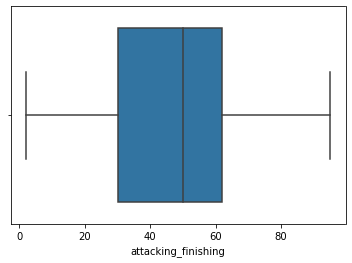

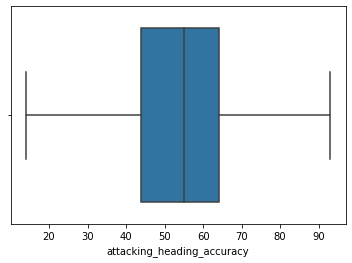

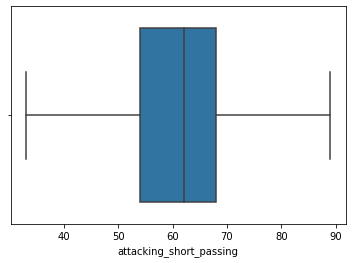

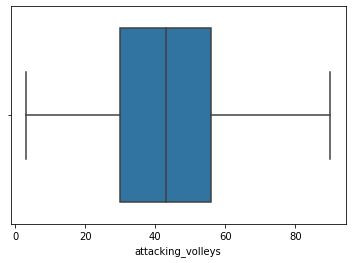

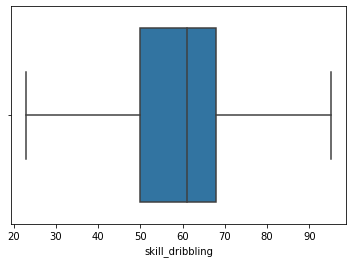

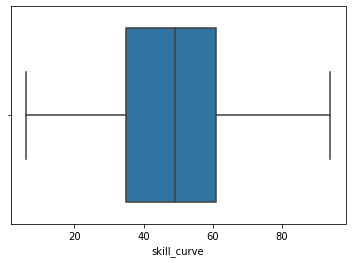

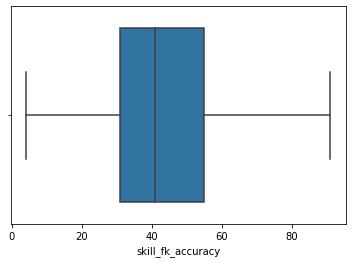

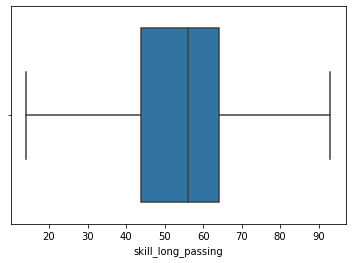

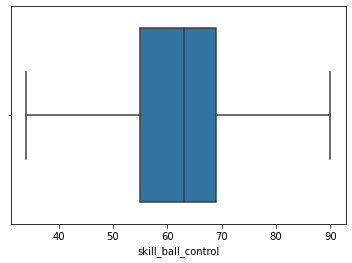

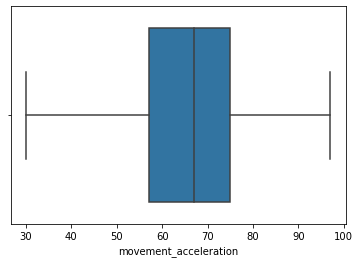

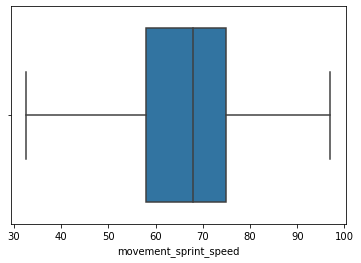

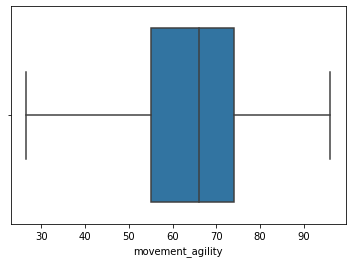

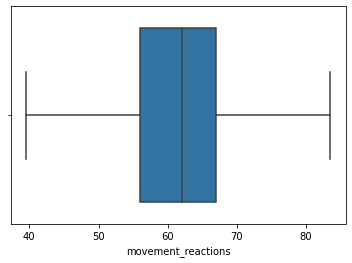

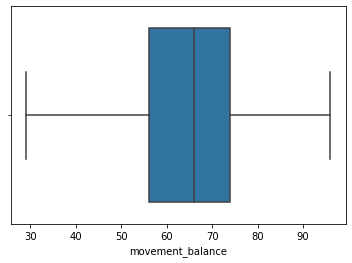

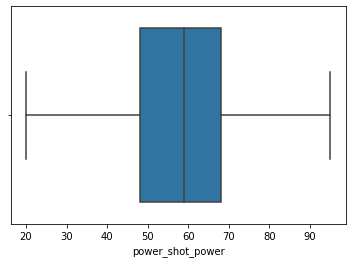

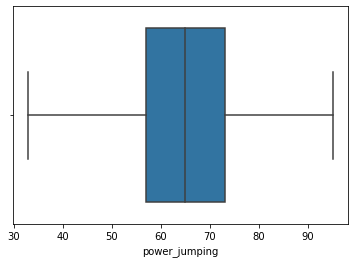

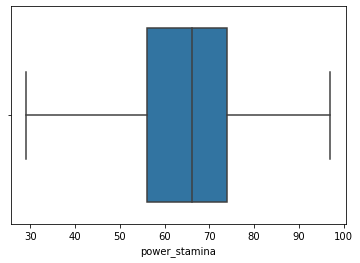

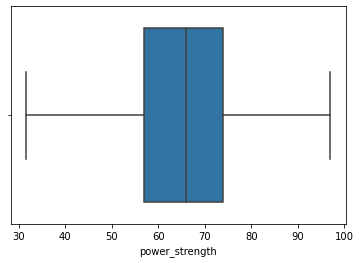

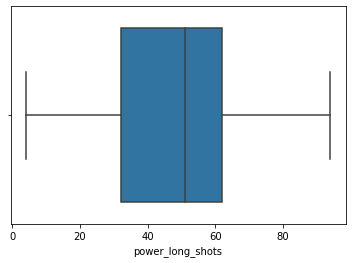

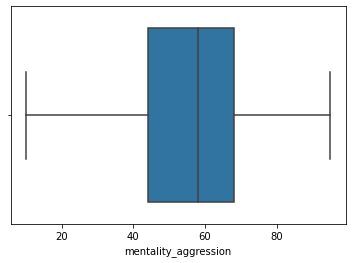

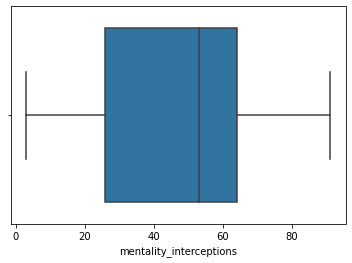

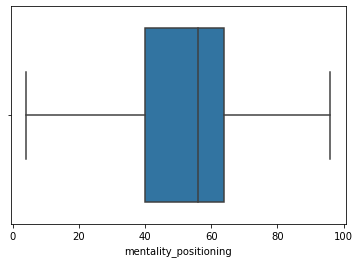

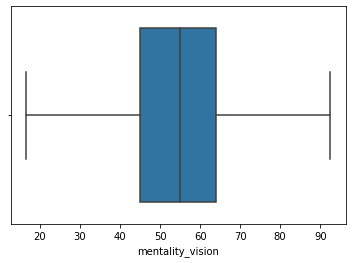

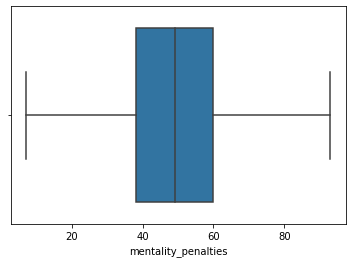

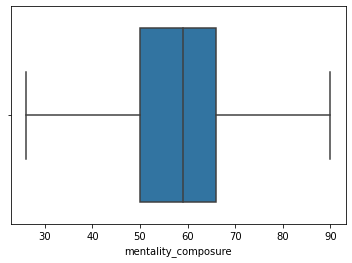

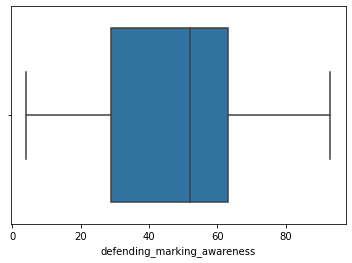

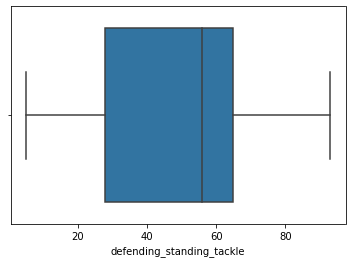

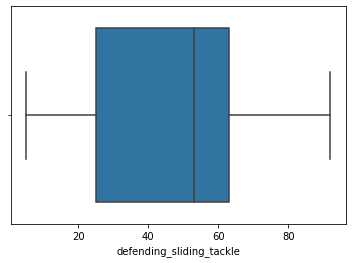

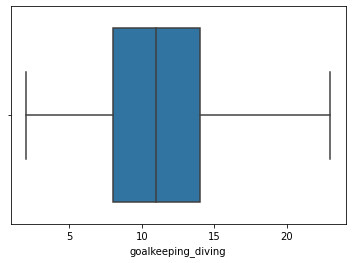

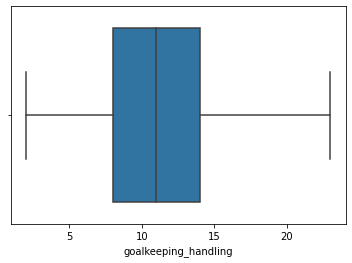

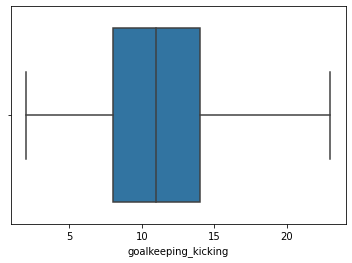

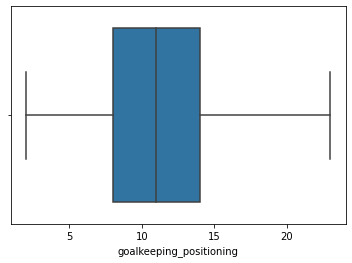

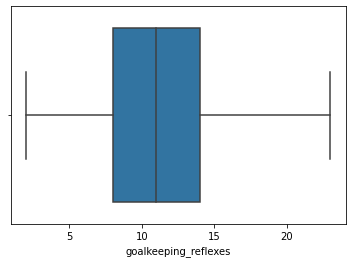

In [51]:
import warnings
warnings.filterwarnings('ignore')

for i in numeric_columns:
    sns.boxplot(df[i])
    plt.show()

Видно, что выбросов нет, обрабатываем данные дальше

### Работа с дубликатами и мусором

Как мы уже проверили в начале, дубликатов в датасете нет. Но если бы они были, нужно было бы выполнить следующий блок (мы тоже можем это сделать, просто ничего не удалится)

In [35]:
df.drop_duplicates()

short_name  overall  potential  value_eur  wage_eur   age  \
0                L. Messi     93.0       93.0  4287500.0   18500.0  34.0   
1          R. Lewandowski     92.0       92.0  4287500.0   18500.0  32.0   
2       Cristiano Ronaldo     91.0       91.0  4287500.0   18500.0  36.0   
3               Neymar Jr     91.0       91.0  4287500.0   18500.0  29.0   
4            K. De Bruyne     91.0       91.0  4287500.0   18500.0  30.0   
...                   ...      ...        ...        ...       ...   ...   
19234           Song Defu     47.0       52.0    70000.0    1000.0  22.0   
19235           C. Porter     47.0       59.0   110000.0     500.0  19.0   
19236            N. Logue     47.0       55.0   100000.0     500.0  21.0   
19237           L. Rudden     47.0       60.0   110000.0     500.0  19.0   
19238  E. Lalchhanchhuaha     47.0       60.0   110000.0     500.0  19.0   

       height_cm  weight_kg  club_team_id  league_level  ...  \
0          170.0       72.0          73.0           1.0  ...   
1          185.0       81.0          21.0           1.0  ...   
2          187.0       83.0          11.0           1.0  ...   
3          175.0       68.0          73.0           1.0  ...   
4          181.0       70.0          10.0           1.0  ...   
...          ...        ...           ...           ...  ...   
19234      180.0       64.0      112541.0           1.0  ...   
19235      175.0       70.0         445.0           1.0  ...   
19236      178.0       72.0      111131.0           1.0  ...   
19237      173.0       66.0      111131.0           1.0  ...   
19238      167.0       61.0      113040.0           1.0  ...   

      mentality_penalties  mentality_composure  defending_marking_awareness  \
0                    75.0                 90.0                         20.0   
1                    90.0                 88.0                         35.0   
2                    88.0                 90.0                         24.0   
3                    93.0                 90.0                         35.0   
4                    83.0                 89.0                         68.0   
...                   ...                  ...                          ...   
19234                42.0                 37.0                         38.0   
19235                44.0                 47.0                         37.0   
19236                39.0                 36.0                         38.0   
19237                49.0                 47.0                         10.0   
19238                35.0                 36.0                         33.0   

       defending_standing_tackle  defending_sliding_tackle  \
0                           35.0                      24.0   
1                           42.0                      19.0   
2                           32.0                      24.0   
3                           32.0                      29.0   
4                           65.0                      53.0   
...                          ...                       ...   
19234                       43.0                      48.0   
19235                       44.0                      47.0   
19236                       44.0                      48.0   
19237                       14.0                      11.0   
19238                       31.0                      37.0   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                     6.0                  11.0                 15.0   
1                    15.0                   6.0                 12.0   
2                     7.0                  11.0                 15.0   
3                     9.0                   9.0                 15.0   
4                    15.0                  13.0                  5.0   
...                   ...                   ...                  ...   
19234                 6.0                  10.0                  5.0   
19235                11.0                  12.0                

Если бы были "мусорные" значения, нужно было бы их заменить каким-либо способом

### Кодировка данных

Преобразуем объекты в числовые значения для проведения обучения модели данных. Создаем новый датасет на основе исходного, применяя кодировку столбцов типа object

In [36]:
dummy = pd.get_dummies(data = df, columns = ["short_name", "position"], drop_first = True)

In [37]:
dummy

overall  potential  value_eur  wage_eur   age  height_cm  weight_kg  \
0         93.0       93.0  4287500.0   18500.0  34.0      170.0       72.0   
1         92.0       92.0  4287500.0   18500.0  32.0      185.0       81.0   
2         91.0       91.0  4287500.0   18500.0  36.0      187.0       83.0   
3         91.0       91.0  4287500.0   18500.0  29.0      175.0       68.0   
4         91.0       91.0  4287500.0   18500.0  30.0      181.0       70.0   
...        ...        ...        ...       ...   ...        ...        ...   
19234     47.0       52.0    70000.0    1000.0  22.0      180.0       64.0   
19235     47.0       59.0   110000.0     500.0  19.0      175.0       70.0   
19236     47.0       55.0   100000.0     500.0  21.0      178.0       72.0   
19237     47.0       60.0   110000.0     500.0  19.0      173.0       66.0   
19238     47.0       60.0   110000.0     500.0  19.0      167.0       61.0   

       club_team_id  league_level  club_jersey_number  ...  position_RDM  \
0              73.0           1.0                30.0  ...             0   
1              21.0           1.0                 9.0  ...             0   
2              11.0           1.0                 7.0  ...             0   
3              73.0           1.0                10.0  ...             0   
4              10.0           1.0                17.0  ...             0   
...             ...           ...                 ...  ...           ...   
19234      112541.0           1.0                36.0  ...             0   
19235         445.0           1.0                27.0  ...             0   
19236      111131.0           1.0                31.0  ...             0   
19237      111131.0           1.0                12.0  ...             0   
19238      113040.0           1.0                13.0  ...             0   

       position_RES  position_RF  position_RM  position_RS  position_RW  \
0                 0            0            0            0            1   
1                 0            0            0            0            0   
2                 0            0            0            0            0   
3                 0            0            0            0            0   
4                 0            0            0            0            0   
...             ...          ...          ...          ...          ...   
19234             0            0            0            0            0   
19235             1            0            0            0            0   
19236             1            0            0            0            0   
19237             1            0            0            0            0   
19238             0            0            0            0            0   

       position_RWB  position_ST  position_SUB  position_Unknown  
0                 0            0             0                 0  
1                 0            1             0                 0  
2                 0            1             0                 0  
3                 0            0             0                 0  
4                 0            0             0                 0  
...             ...          ...           ...               ...  
19234             0            0             1                 0  
19235             0            0             0                 0  
19236             0            0             0                 0  
19237             0            0             0                 0  
19238             0            0             1                 0  

[19239 rows x 18220 columns]

После проработки всех данных можно вывести гистограммы, на которых могут быть отображены, например, график нормального распределения для данных и интервал доверия, вычисленный по правилу двух сигм

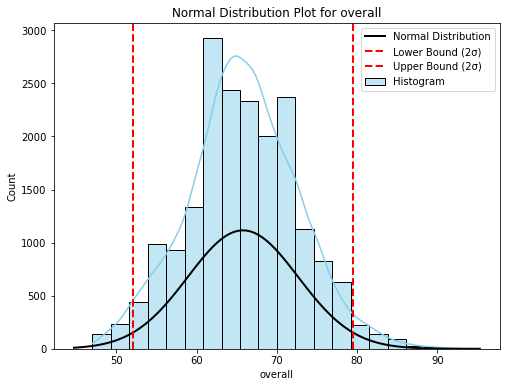

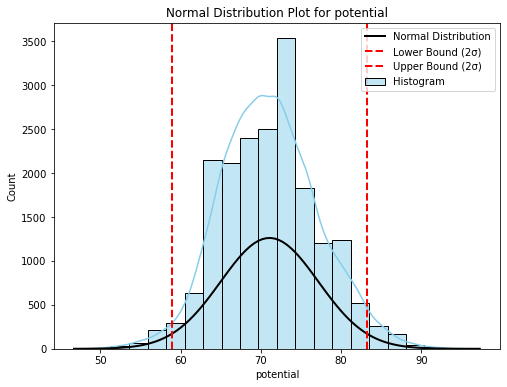

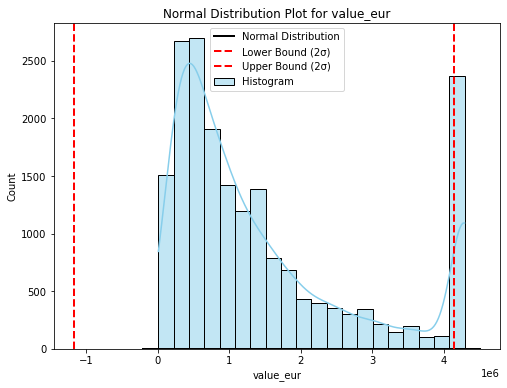

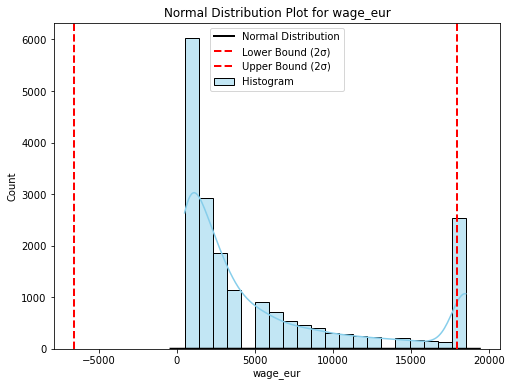

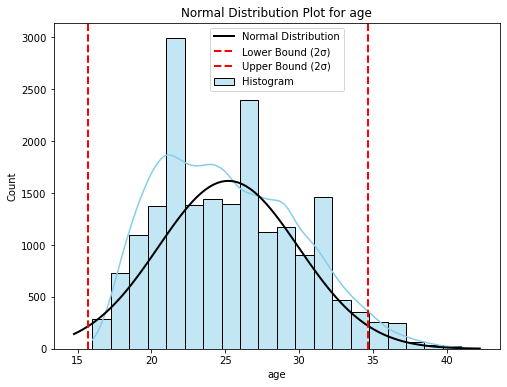

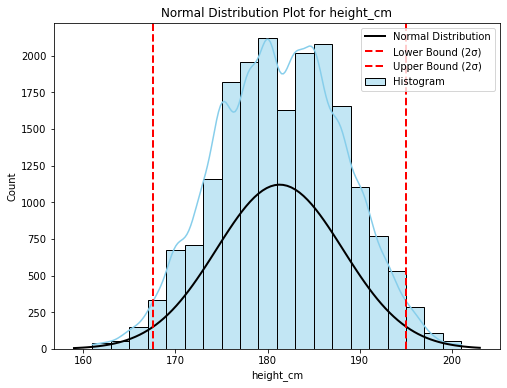

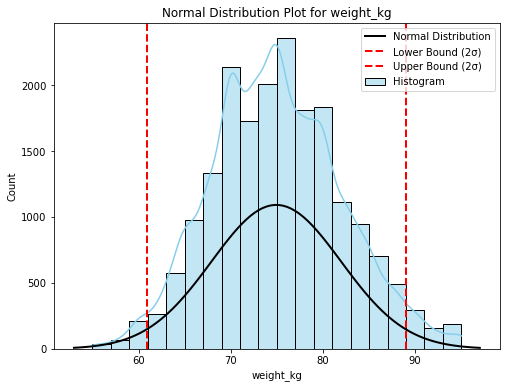

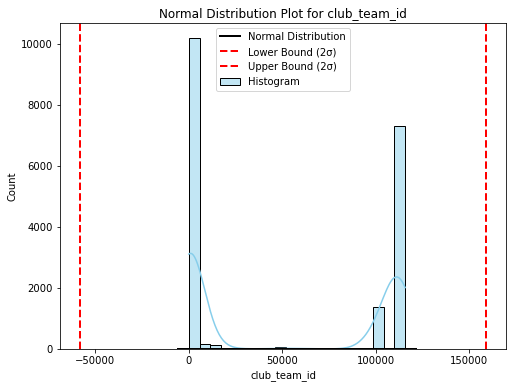

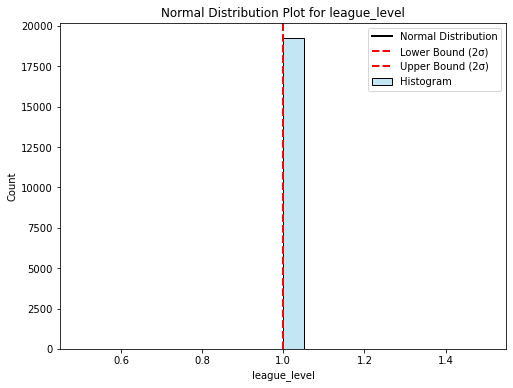

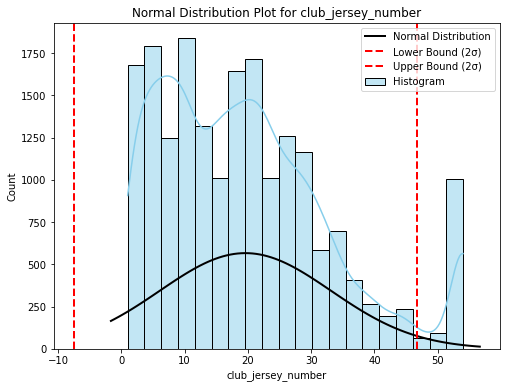

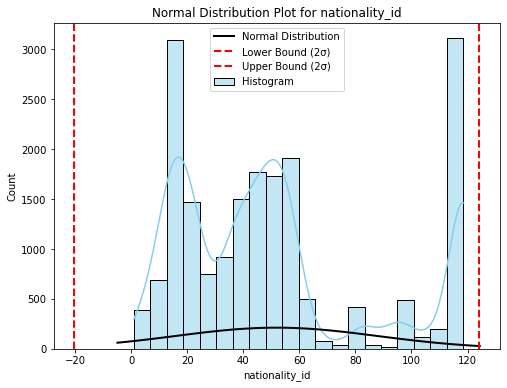

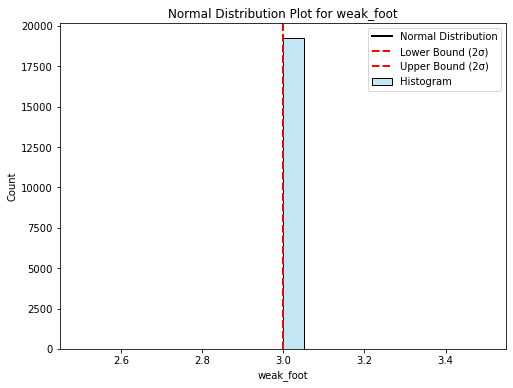

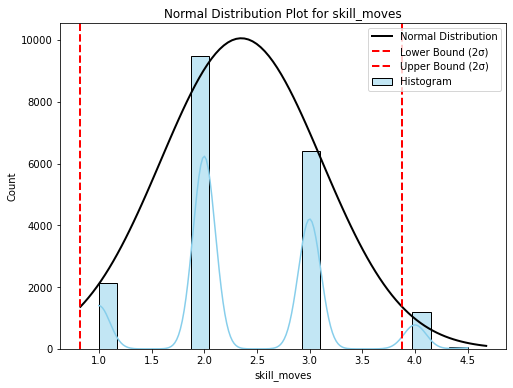

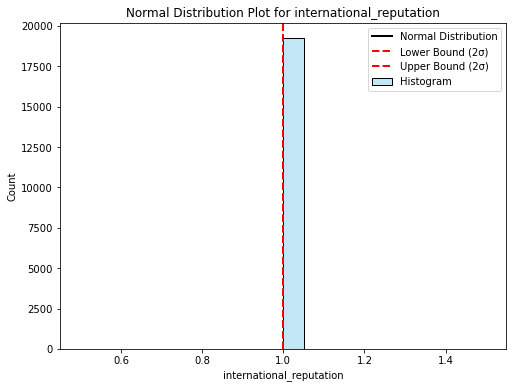

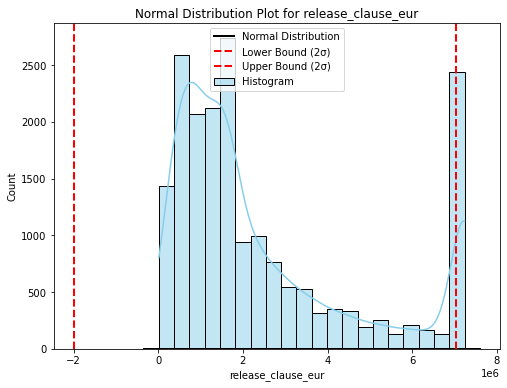

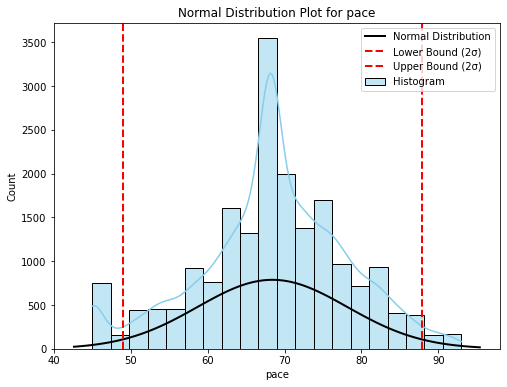

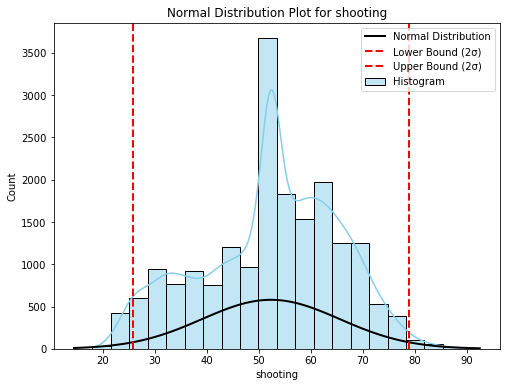

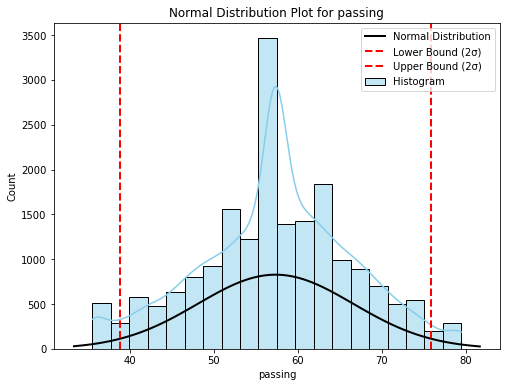

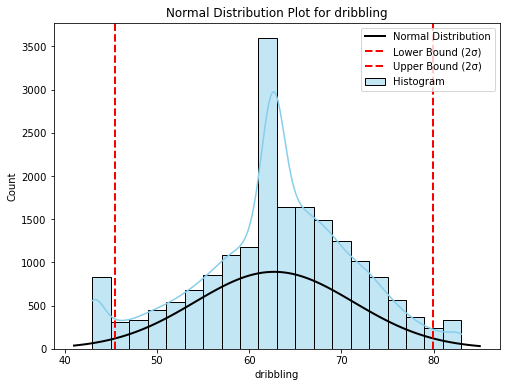

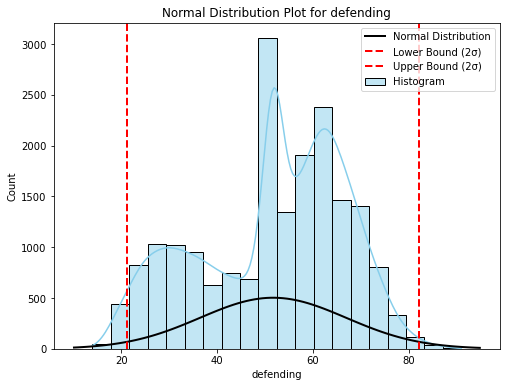

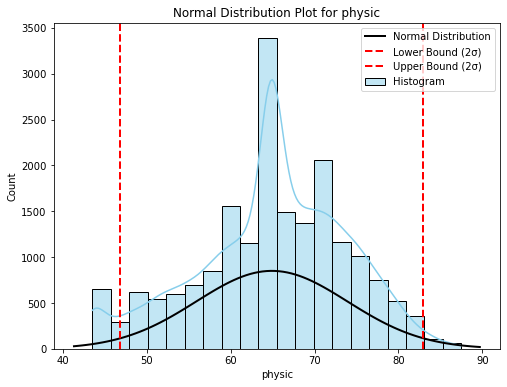

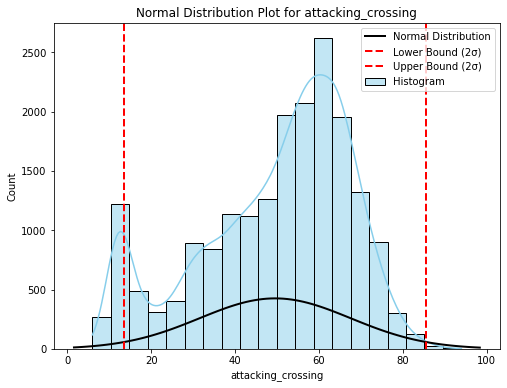

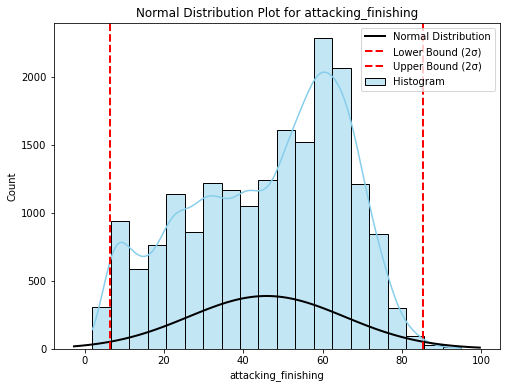

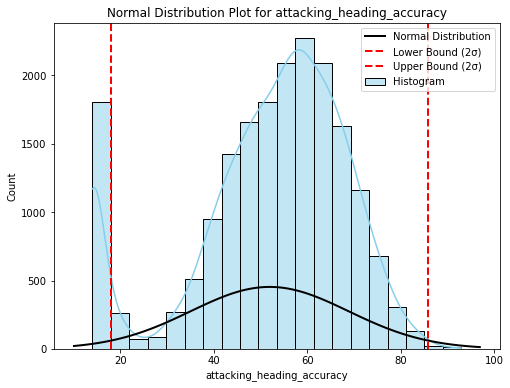

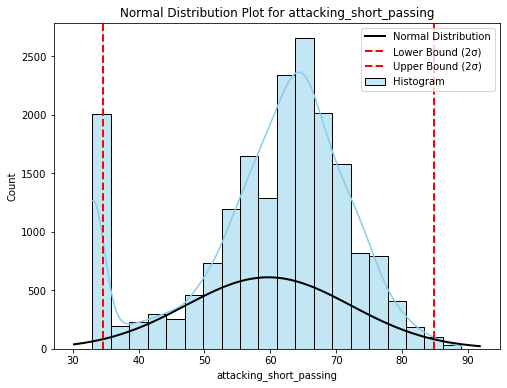

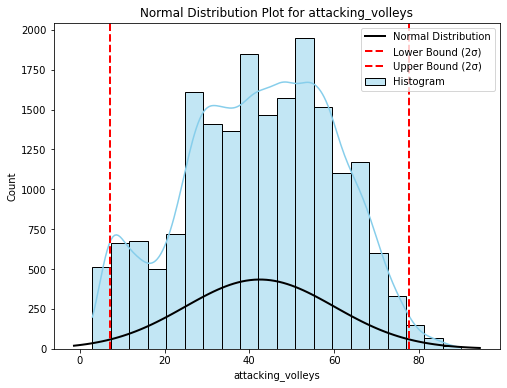

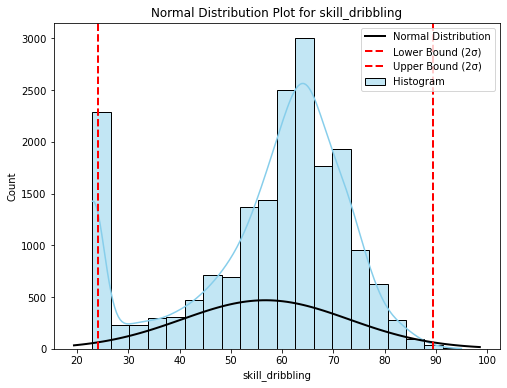

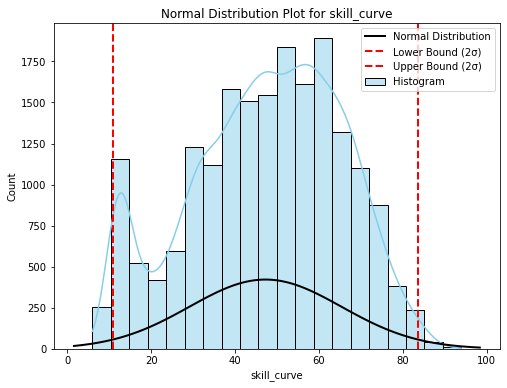

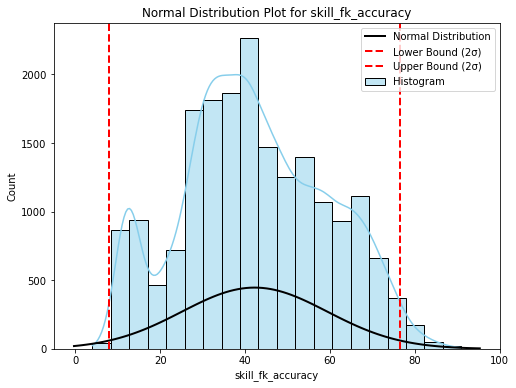

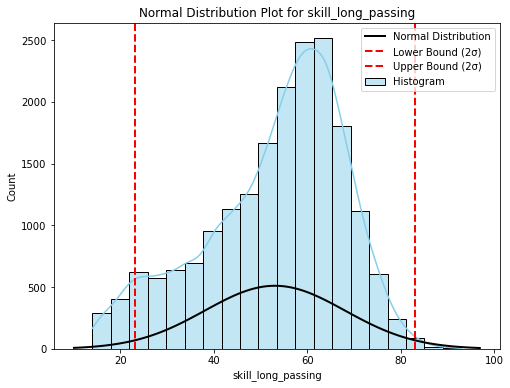

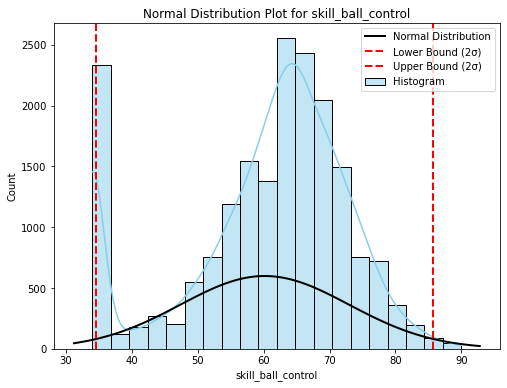

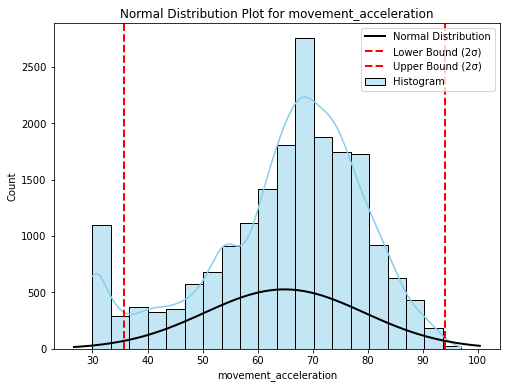

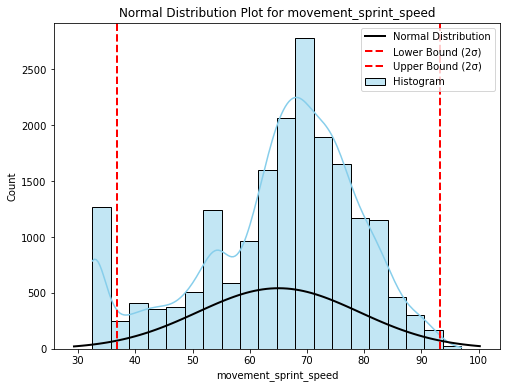

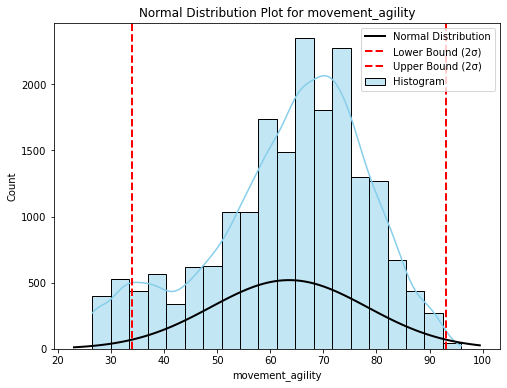

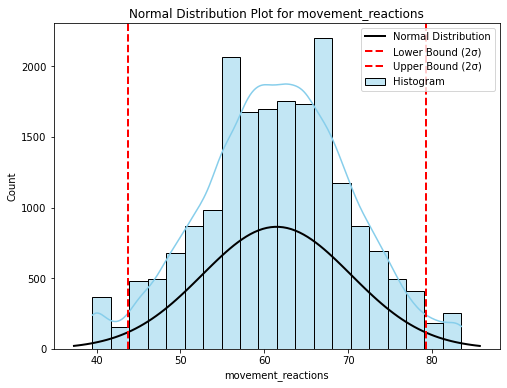

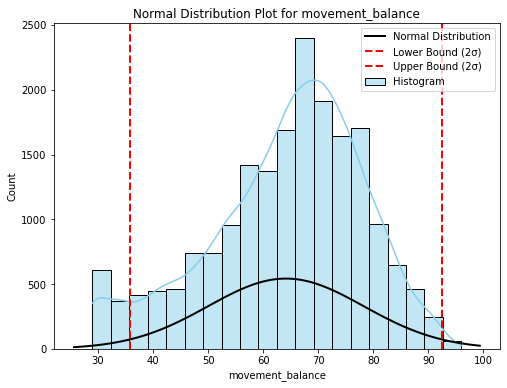

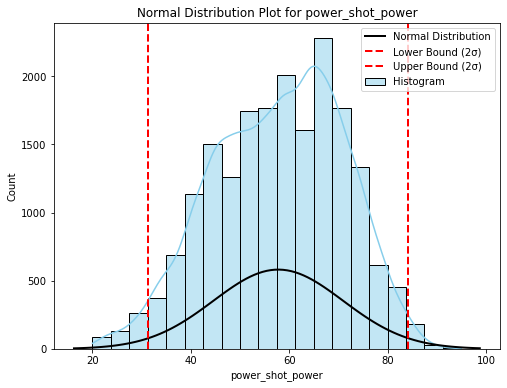

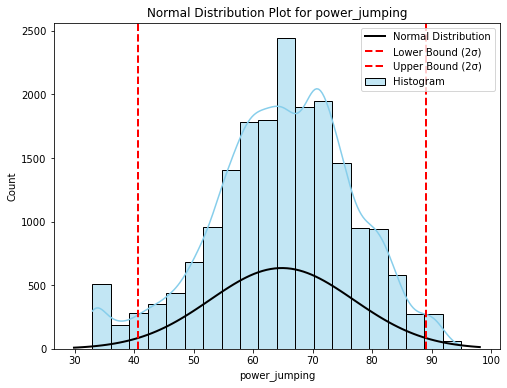

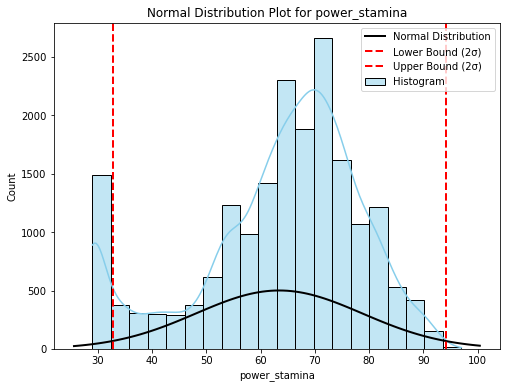

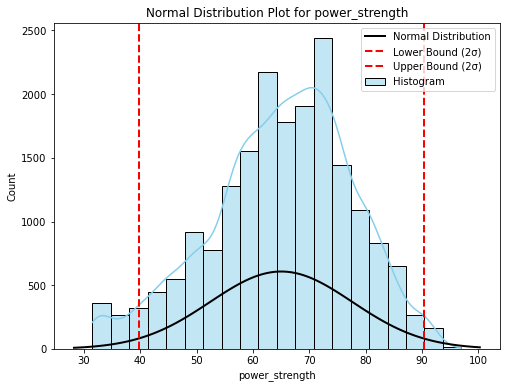

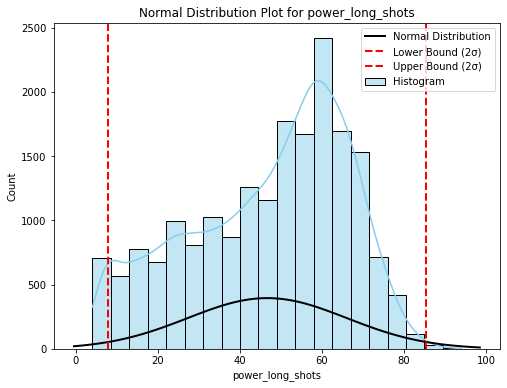

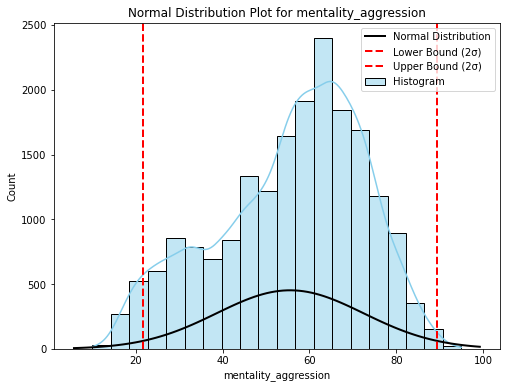

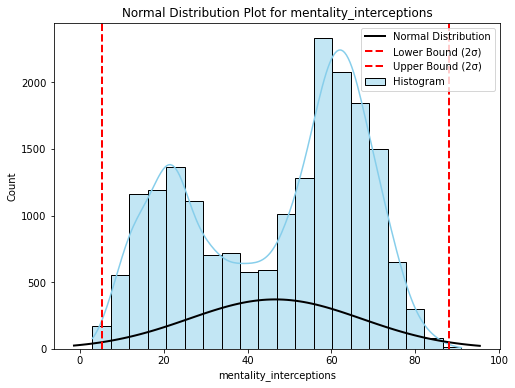

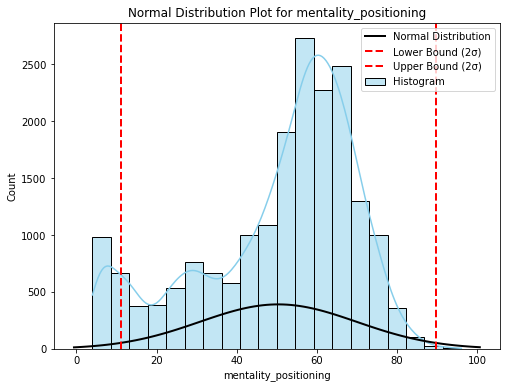

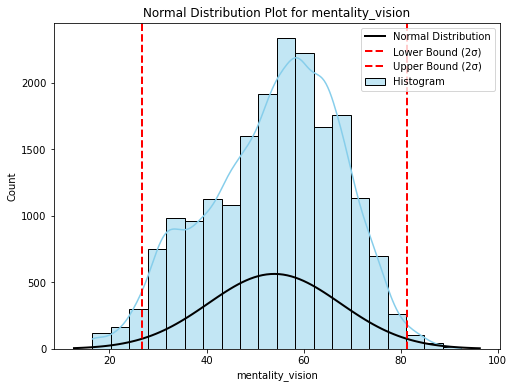

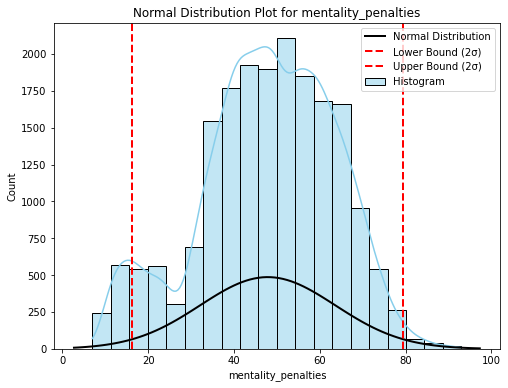

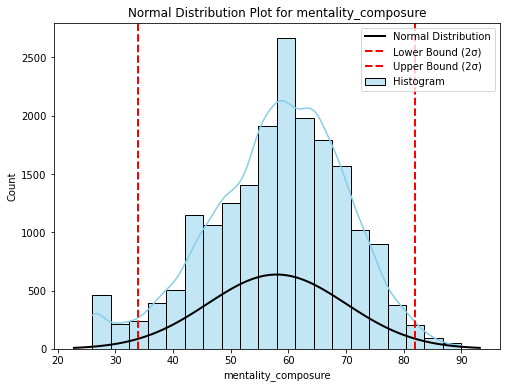

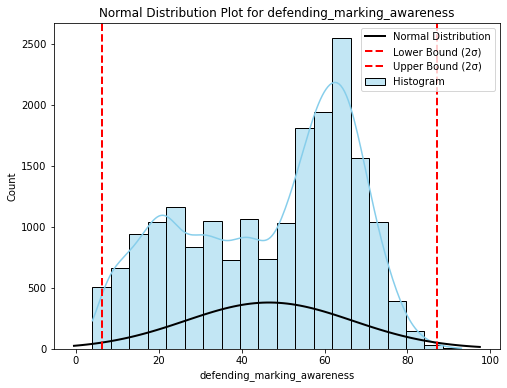

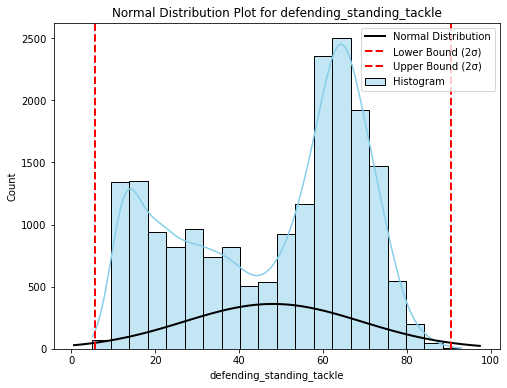

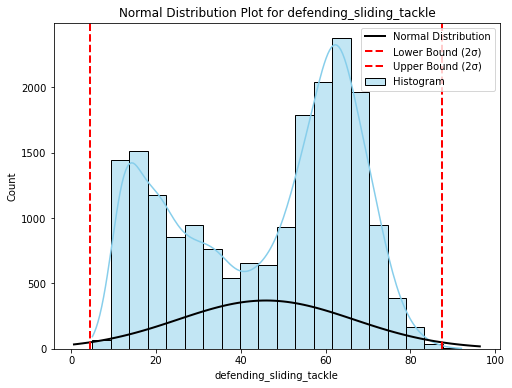

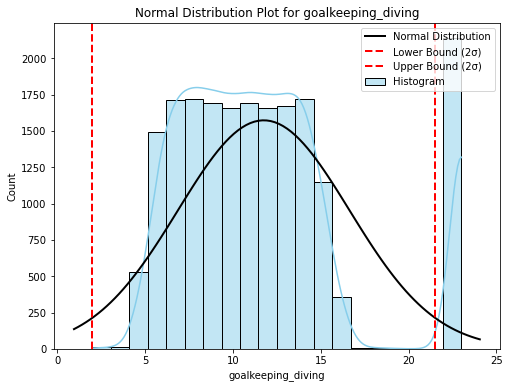

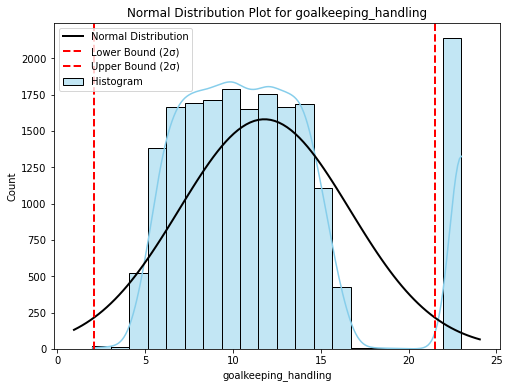

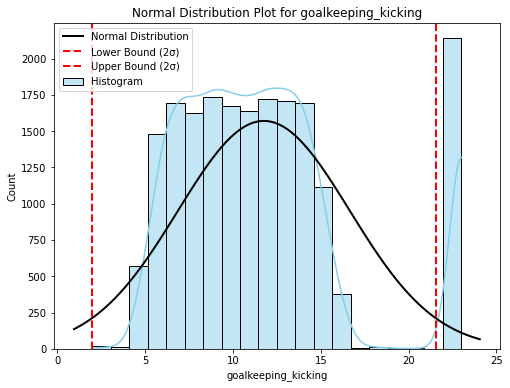

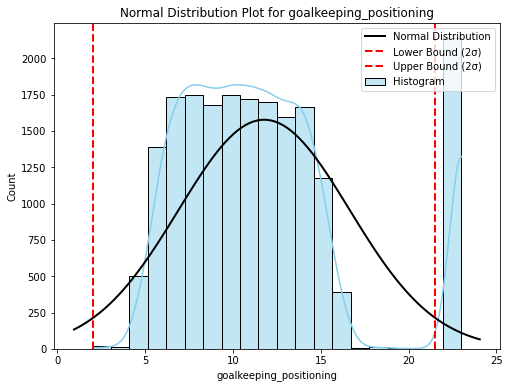

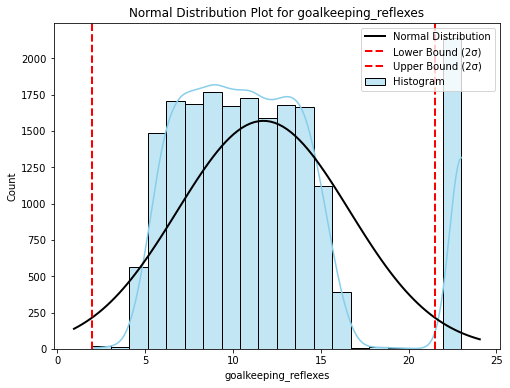

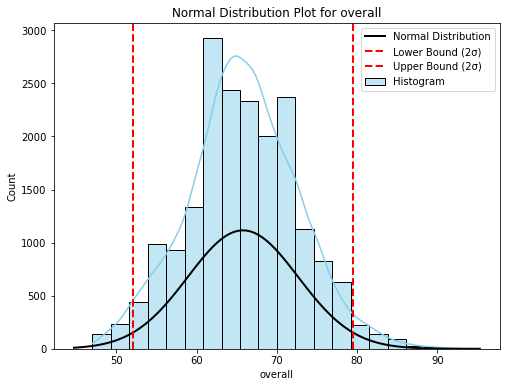

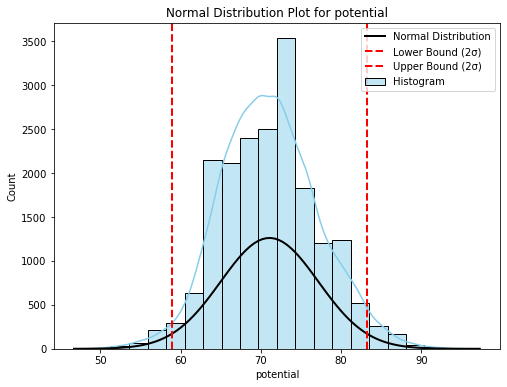

In [52]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.append('overall')
numeric_columns.append('potential')

for i in numeric_columns:
    mean, std = norm.fit(df[i])
    
    plt.figure(figsize=(8, 6))
    
    # Гистограмма
    sns.histplot(df[i], kde=True, bins=20, label='Histogram', color='skyblue')
    
    # Линия нормального распределения
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    p = p * len(df[i])  # Масштабирование линии, учитывая количество бинов в гистограмме
    plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
    
    # Добавление интервала доверия на основе правила 2-х сигм
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    plt.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label='Lower Bound (2σ)')
    plt.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label='Upper Bound (2σ)')
    
    plt.title(f'Normal Distribution Plot for {i}')
    plt.legend()
    plt.show()

#### Но для чего нам этот график?

График нормального распределения и интервал по правилу двух сигм могут быть полезными для визуального анализа распределения данных и выявления потенциальных выбросов или аномалий. Вот несколько сценариев, когда это может быть полезно:

Оценка нормальности распределения:
График нормального распределения помогает визуально оценить, насколько данные приближаются к нормальному распределению. Это может быть важным, например, при применении статистических методов, которые предполагают нормальность данных, таких как t-тесты или анализ дисперсии (ANOVA).

Выявление выбросов:
Интервал по правилу двух сигм (или другим правилам) может быть использован для выявления выбросов. Если значения находятся за пределами этого интервала, они могут считаться потенциальными выбросами, требующими дополнительного внимания при анализе.

Определение диапазона нормальных значений:
Интервал по правилу двух сигм также может служить ориентировочным диапазоном, в пределах которого можно считать значения нормальными. Это может быть полезно при установлении границ для отсеивания аномалий или при определении диапазона ожидаемых значений.

Контроль качества данных:
График нормального распределения и интервалы могут использоваться в контексте контроля качества данных. Если данные значительно отклоняются от нормальности или если встречаются значения за пределами интервалов, это может указывать на проблемы с данными или требовать дополнительного исследования.

Однако стоит помнить, что нормальность распределения не всегда является обязательным условием для применения статистических методов, в нашем случае такие данные тоже есть.

### Предобработка данных завершена, на основе полученного датасета можно проводить обучение модели